# <b><span style="color:#845EC2"> Results and Analysis</span></b>

<b><span style="color:#b59eda"> Metric Calculations and Plots for the transcriptions</span></b>


<!-- 
Calculate the confusion matrix, accuracy, precision and recall for the given models in a directory

Plot or save all the results

Minimizing false positives or ensuring no relevant instances are missed, then focusing on precision or recall might be more appropriate.

NB! Aggregate Metrics: Depending on your focus, aggregate these metrics either by taking the mean (for a general overview) or by using macro- or micro-averaging (to account for class imbalance). Macro-averaging treats all classes equally, while micro-averaging weights each instance equally, providing a balance that considers both the number of instances and the distribution of classes.

^This could be relevant for the non-native data-->

<b><span style="color:#845EC2">845EC2</span></b>
<b><span style="color:#D65DB1">D65DB1</span></b>
<b><span style="color:#FF6F91">FF6F91</span></b>
<b><span style="color:#FF9671">FF9671</span></b>
<b><span style="color:#FFC75F">FFC75F</span></b>
<b><span style="color:#F9F871">F9F871</span></b> 

In [76]:
# Libary inmports
import self_made_functions as smf
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from textwrap import wrap # Wrap text for long titles

# Load original dataset
df_assessment, wv_path = smf.get_correct_df()

## <b><span style="color:#D65DB1"> Transcription of one word </span></b>
<!-- <b><span style="color:#d65db1"> d65db1 </span></b> -->
<!-- <b><span style="color:#da6db9"> da6db9 </span></b> -->
<b><span style="color:#de7dc1"> de7dc1 </span></b>
<b><span style="color:#e28ec8"> e28ec8 </span></b>
<b><span style="color:#e69ed0"> e69ed0 </span></b>
<b><span style="color:#ebaed8"> ebaed8 </span></b>
<b><span style="color:#efbee0"> efbee0 </span></b>

Split the results into the score categories, and focus on <b><span style="color:#d65db1">version 1</span></b> in the first instance

### <b><span style="color:#de7dc1"> The transcription files are changed and re saved </span></b>

The <b><span style="color:#d65db1">empty-transcriptions</span></b> are added to the transcriptions.

The <b><span style="color:#d65db1">Phonetic Error Ratio (PER)</span></b> is calculated. 

A <b><span style="color:#d65db1">ID column</span></b> is added, and all the colum names are <b><span style="color:#d65db1">renamed</span></b> and organized.


A column for the <b><span style="color:#d65db1">model name</span></b> is also added. 

In [75]:
# Transcription directory information
transcription_dir = './Transcriptions'
lst_csv = os.listdir(transcription_dir)
lst_csv = [file for file in lst_csv if file.endswith('v1.csv')] # The v1 transcriped files
lst_model_name = [name.split('_')[1] for name in lst_csv]

# Make new directory for the resaved files
results_dir = './Transcriptions/Results'
if not os.path.exists(results_dir):
    os.makedirs(results_dir)
    print(f"Directory {results_dir} created")

# Path to the empty files
empty_transcriptions = pd.read_csv('Transcriptions/Empty_Transcriptions/empty_transcription_v1.csv')
    
# Go throng all the csv files:
# calculate cer, add ID column, and rename columns, add model name, and add empty CER
# def resave_transcription_df():
lst_path = [os.path.join(transcription_dir, file) for file in lst_csv]

for path in lst_path:    
    # Read transcriped files
    df_csv = pd.read_csv(path)
    df_csv = df_csv.drop(['CER Output',"CER Score"], axis=1) # axis = 1 : drops column, = 0 : drops row 
    
    model_name = path.split('_')[-2]
    
    # ------------------- Empty Transcriptions that is not picked up ------------------- #
    leaf_row = df_original[~df_original['File name'].isin(df_csv['File name'])] # Finda all the rows that are not in the transcription file
    print(model_name)
    print(len(leaf_row), len(leaf_row.drop_duplicates(subset='File name')))

nb-whisper-tiny-verbatim
3 3
nb-whisper-base-verbatim
104 104
nb-whisper-medium-verbatim
6 6
tiny
3 3
base
6 6
medium
3 3
nb-whisper-tiny
3 3
nb-whisper-base
40 40
nb-whisper-medium
27 27


In [ ]:

    
    break
    
    # Add empty transcriptions
    if model_name in empty_transcriptions["Model"].tolist():
        print(f"Empty transcriptions from model: {model_name}")
        # Find rows that correspond whit the current model
        current_empty_model = empty_transcriptions[empty_transcriptions["Model"]== model_name]
        empty_file_names = current_empty_model['File name'].tolist()
        new_empty_rows = df_original[df_original['File name'].isin(empty_file_names)]
        # Drop columns we don't need
        new_empty_rows = new_empty_rows.drop(['Prosody','Noise/Disruption','Pre-speech noise','Repetition', 'Assessor', 'Pronunciation'], axis=1)
        leaf_row = df_original[~df_original['File name'].isin(df_csv['File name'])]
        leaf_row = leaf_row.drop(['Prosody','Noise/Disruption','Pre-speech noise','Repetition', 'Assessor', 'Pronunciation'], axis=1)
        
        # Calulate PER and add CER = 1.0
        new_empty_rows['per'] =  new_empty_rows.apply(lambda x: x['pronScores'].split(' ').count('0')/len(x['pronScores'].split(' ')), axis=1)
        leaf_row['per'] =  leaf_row.apply(lambda x: x['pronScores'].split(' ').count('0')/len(x['pronScores'].split(' ')), axis=1)
        
        new_empty_rows['CER'] = 1.0
        leaf_row['CER'] = 1.0
        
        empty_rows = new_empty_rows.drop(['pronScores'], axis=1)
        leaf_row = leaf_row.drop(['pronScores'], axis=1)
        
        
        
        # Concatenate to the transcription dataframe
        df_csv = pd.concat([df_csv, empty_rows])
        df_csv['model_name'] = model_name
        df_csv_leaf = pd.concat([df_csv, leaf_row])
        df_csv_leaf['model_name'] = model_name
        print(df_csv.model_name.unique())
        # print(df_csv_leaf['File name'].values)
        print(len(df_csv), len(df_csv.drop_duplicates('File name')))
        print(len(df_csv_leaf), len(df_csv_leaf.drop_duplicates('File name')))
        print(len(df_original))
    else: 
        print(model_name)
        print(len(df_csv))
    
    
    # print(model_name, len(df_csv))
    # empty_leaf_df = df_original[~df_original['File name'].isin(df_csv['File name'])]
    
    # print(empty_leaf_df)
        
    


['nb-whisper-medium']
9319 9346


In [ ]:
    
    # Add model name
    df_csv["model_name"] = model_name
    
    # Change names
    df_csv = df_csv.rename(columns={"File name": "file_name",
                                "CER (Character Error Rate)": "CER", # Character Error Rate (CER)
                                "Word": "target_word", 
                                "Transcribed": "transcribed_word", 
                                "OG Score": "global_score"})
    
    
    # Add Phonetic Error Rate for the target words
    for i, row in df_csv.iterrows():
        pron_lst = df_original[df_original['File name'] == row["file_name"]].pronScores.values[0].split(' ')
        pron_count = pron_lst.count('0')
        per = pron_count/len(pron_lst)
        df_csv.loc[i, "PER"] = per # Phonetic Error Rate (PER)
    
    # Add ID column
    df_csv["id"] = df_csv["file_name"].apply(lambda x: x.split('_')[0])
    

    

    
    
    # Reorder column names
    reorder_column = ["id", "global_score", 
                    "target_word", "PER", 
                    "transcribed_word", "CER",
                    "transcribed_score", 
                    "file_name", "model_name"]
    
    df_csv = df_csv[reorder_column]
    
    print(df_csv["transcribed_score"])
    break
    # Save the file
    csv_name = path.split('/')[-1]
    df_csv.to_csv(os.path.join(results_dir, csv_name), index=False)
        
# resave_transcription_df()


In [35]:
#     # Add empty transcriptions
empty_transcriptions = pd.read_csv('Transcriptions/Empty_Transcriptions/empty_transcription_v1.csv')
current_empty_model = empty_transcriptions[empty_transcriptions["Model"]=='nb-whisper-base']
empty_file_names = current_empty_model['File name'].tolist()
new_empty_rows = df_original[df_original['File name'].isin(empty_file_names)]

new_empty_rows = new_empty_rows.drop(['Prosody','Noise/Disruption','Pre-speech noise','Repetition', 'Assessor', 'Pronunciation'], axis=1)
new_empty_rows['per'] =  new_empty_rows.apply(lambda x: x['pronScores'].split(' ').count('0')/len(x['pronScores'].split(' ')), axis=1)
new_empty_rows['CER'] = 1.0
new_empty_rows[transcribed_score] = np.NaN
empty_rows = new_empty_rows.drop(['pronScores'], axis=1)

# # Extract the list of file names from df1
# file_names = df1['file_name'].tolist()

# # Filter the columns in df2 to match the file names in df1
# filtered_df2 = df2[file_names]

# # Display the filtered dataframe
# print(filtered_df2)



empty_rows
df_csv
# df_csv["model_name"].values[0]

,id,global_score,target_word,PER,transcribed_word,CER,transcribed_score,file_name,model_name
0,a06,1,hylle,0.50,gyl,1.000000,NaN,a06_hylle.wav,nb-whisper-tiny-verbatim
1,a12,5,hylle,0.00,lø,2.000000,NaN,a12_hylle.wav,nb-whisper-tiny-verbatim
2,a33,5,hylle,0.00,hylle,0.000000,NaN,a33_hylle.wav,nb-whisper-tiny-verbatim
3,d18,5,hylle,0.00,hylle,0.000000,NaN,d18_hylle.wav,nb-whisper-tiny-verbatim
4,a27,3,hylle,0.25,kjelle,0.500000,NaN,a27_hylle.wav,nb-whisper-tiny-verbatim
...,...,...,...,...,...,...,...,...,...
9314,d16,4,smart,0.25,snart,0.200000,NaN,d16_smart.wav,nb-whisper-tiny-verbatim
9315,a10,2,smart,0.50,smarch,0.333333,NaN,a10_smart.wav,nb-whisper-tiny-verbatim
9316,a04,4,smart,0.25,smert,0.200000,NaN,a04_smart.wav,nb-whisper-tiny-verbatim
9317,a25,4,smart,0.25,snart,0.200000,NaN,a25_smart.wav,nb-whisper-tiny-verbatim


### <b><span style="color:#e28ec8"> List CSV file names </span></b>

In [78]:
results_dir = './Transcriptions/Results'
lst_path = [os.path.join(results_dir, file) for file in lst_csv]
lst_path.sort(key=lambda s: len(s)) # Sort the models to be in the correct order - whit help of str lengdt --
models = ['tiny', 'nb-whisper-tiny', 'nb-whisper-tiny-verbatim',
        'base', 'nb-whisper-base', 'nb-whisper-base-verbatim',
        'medium', 'nb-whisper-medium', 'nb-whisper-medium-verbatim']

lst_path.sort(key=lambda s: models.index(s.split('_')[-2]))

### <b><span style="color:#e69ed0"> BOX PLOT: </span></b>
#### <span style="color:#ebaed8">  Every model compar: CER transcribed vs CER original for <b>Native</b>, <b>Non Native</b> and <b>all</b> </span>

Everything saved in a png file in directory BoxPlots/Model_CER

In [79]:
save_dir_box_cer = './Transcriptions/Results/BoxPlots/Model_CER'
if not os.path.exists(save_dir_box_cer):
    os.makedirs(save_dir_box_cer)
    print(f"Directory {save_dir_box_cer} created")

In [80]:
big_boy_df = pd.DataFrame() # Data frame to store the data from all the different models
big_df_a = pd.DataFrame() 
big_df_d = pd.DataFrame() 

# ---------------------------------------  BOX PLOTS --------------------------------------- #
# ------------ Original and Transcribed CER, split into Native and Non - Native ------------ #
for path in lst_path:
    # CSV files ------------ #
    df_csv = pd.read_csv(path)
    
    # Get the correct model name ------------ #
    model_name = path.split('/')[-1].split('_')[-2]
    if model_name.startswith('nb'):
        model_name = model_name.split('-')
        if len(model_name) > 3:
            model_name = model_name[0] + '-' + model_name[2] + '-' + model_name[3]
        else:
            model_name = model_name[0] + '-' + model_name[2] 
    df_csv['model_name'] = model_name
    
    df_a = df_csv[df_csv['id'].str.startswith('a')] # Non - Native speakers
    df_a = df_a.reset_index(drop=True)
    
    df_d = df_csv[df_csv['id'].str.startswith('d')] # Native speakers
    df_d = df_d.reset_index(drop=True)
    
    # Concatenate the data frames ------------ #
    big_boy_df = pd.concat([big_boy_df, df_csv], ignore_index=True)
    big_df_a = pd.concat([big_df_a, df_a], ignore_index=True)
    big_df_d = pd.concat([big_df_d, df_d], ignore_index=True)
    
big_boy_df

,id,original_score,original_word,transcribed_word,original_cer,transcribed_cer,transcribed_score,file_name,model_name,CER Output
0,a06,1,hylle,hjent!,0.50,0.833333,1,a06_hylle.wav,tiny,NaN
1,a12,5,hylle,i lille,0.00,0.571429,3,a12_hylle.wav,tiny,NaN
2,a33,5,hylle,hilla,0.00,0.400000,3,a33_hylle.wav,tiny,NaN
3,d18,5,hylle,heller,0.00,0.333333,4,d18_hylle.wav,tiny,NaN
4,a27,3,hylle,kyrne,0.25,0.600000,2,a27_hylle.wav,tiny,NaN
...,...,...,...,...,...,...,...,...,...,...
83698,d16,4,smart,snart,0.25,0.200000,4,d16_smart.wav,nb-medium-verbatim,NaN
83699,a10,2,smart,schmach,0.50,0.571429,3,a10_smart.wav,nb-medium-verbatim,NaN
83700,a04,4,smart,smart,0.25,0.000000,5,a04_smart.wav,nb-medium-verbatim,NaN
83701,a25,4,smart,snart,0.25,0.200000,4,a25_smart.wav,nb-medium-verbatim,NaN


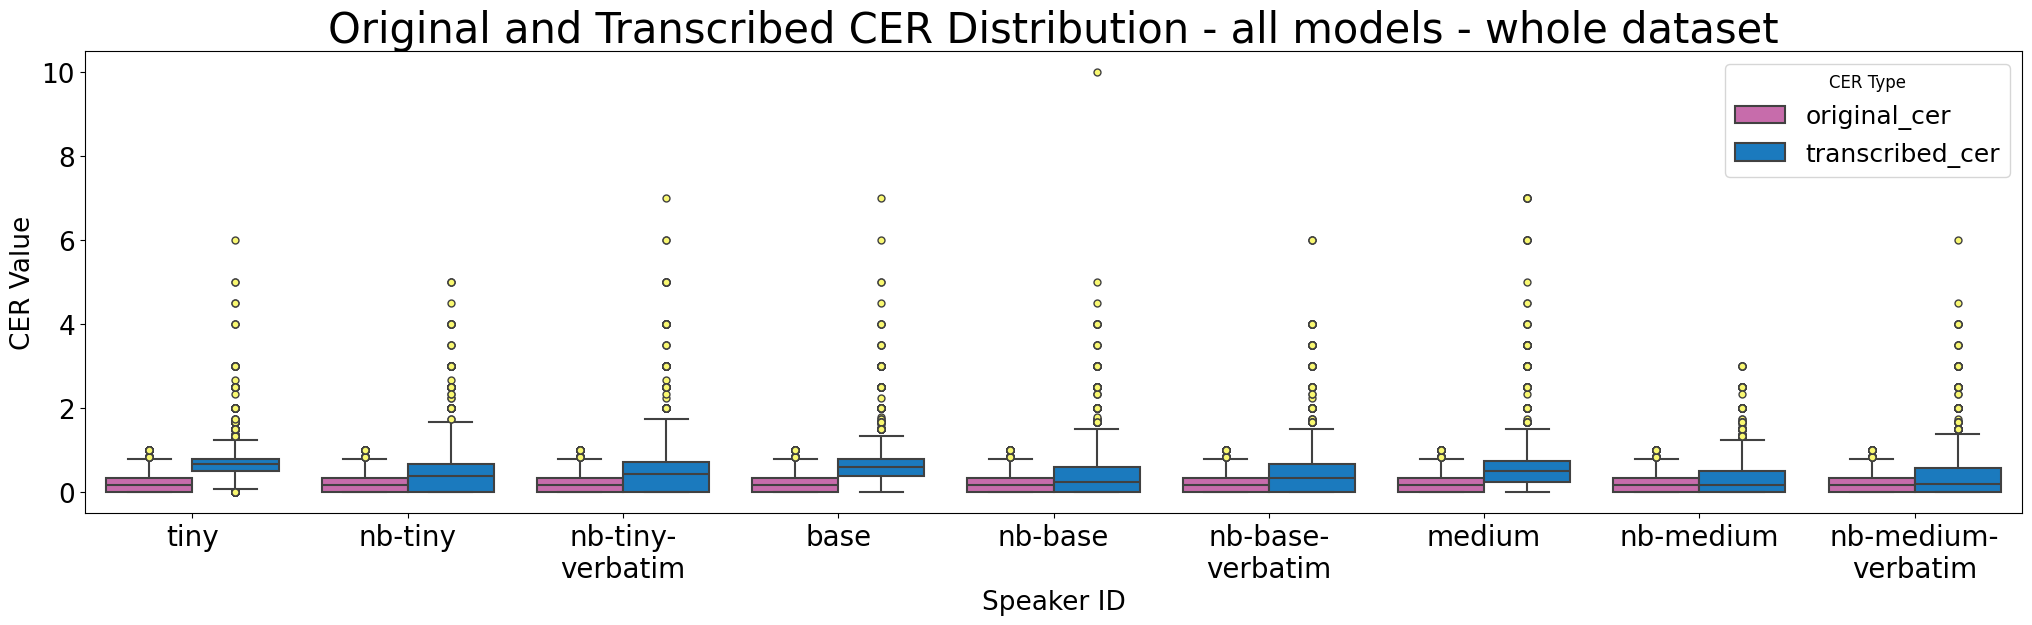

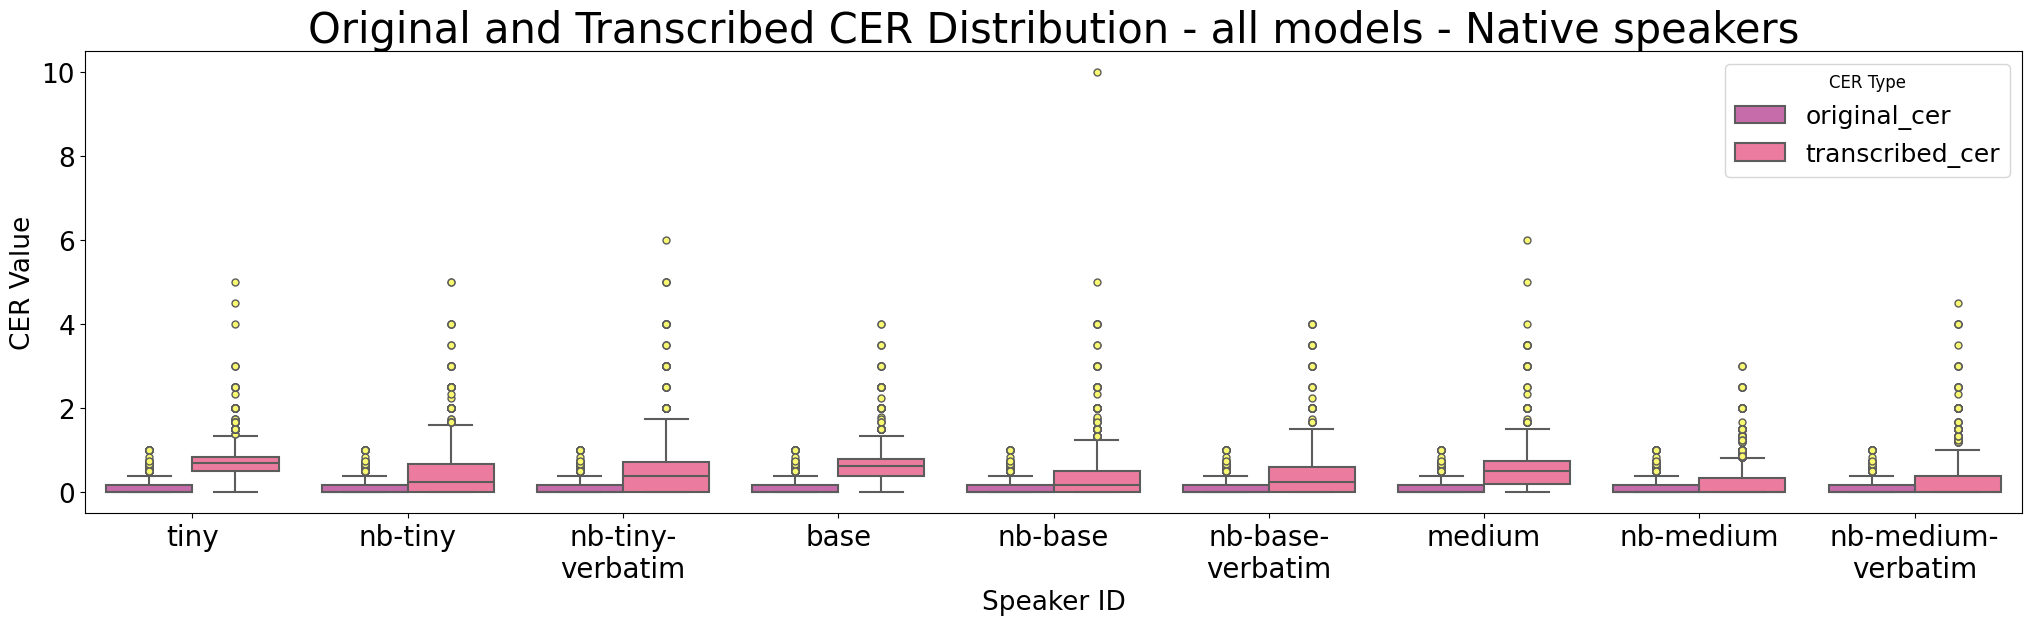

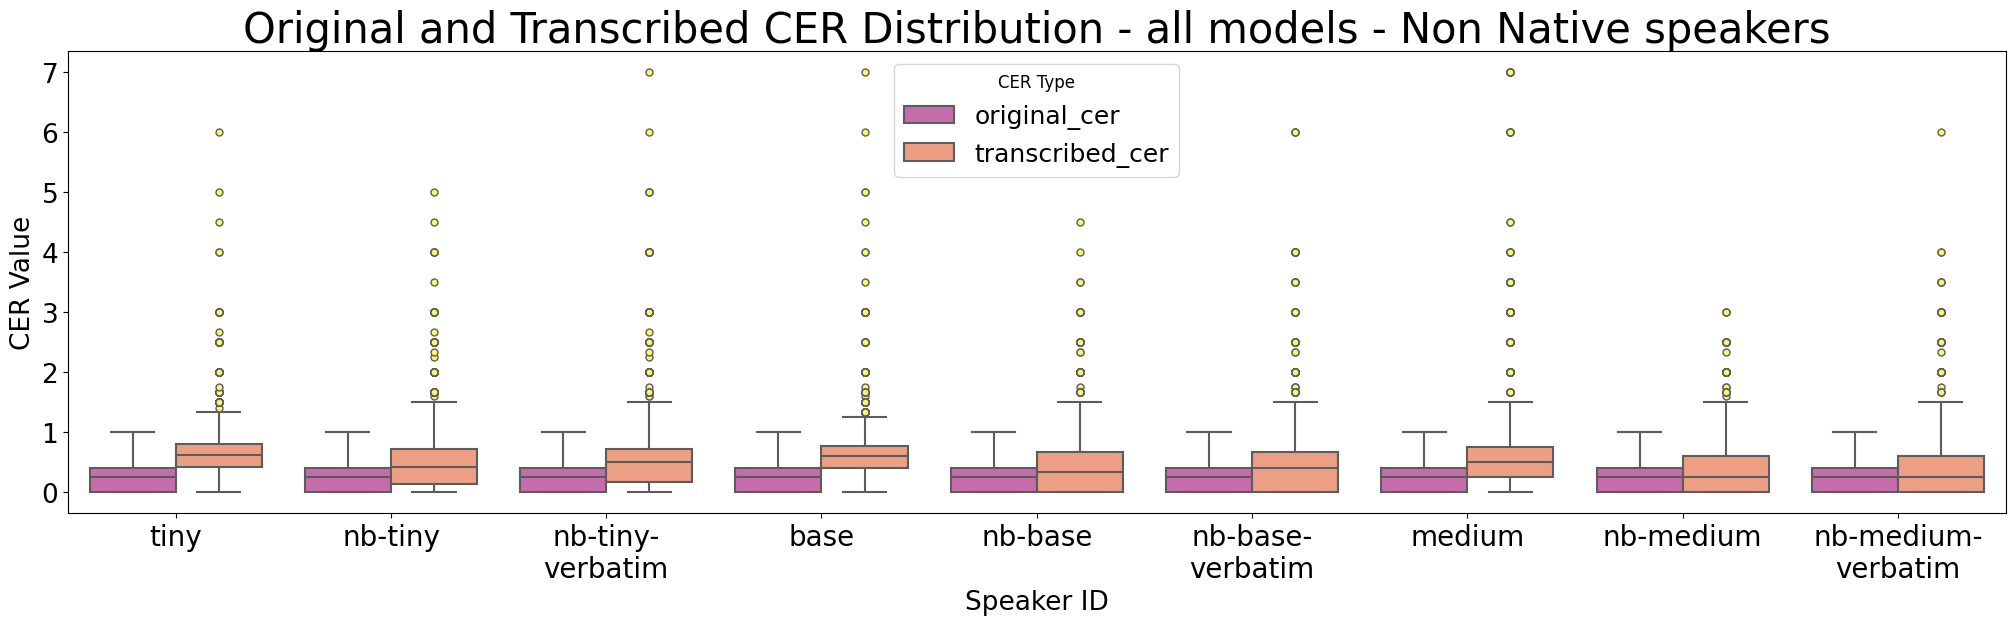

In [81]:

id_vars = ['model_name']
value_vars = ['original_cer', 'transcribed_cer']
var_name = 'cer_type'
value_name = 'cer_value'

df_melted = pd.melt(big_boy_df, id_vars=id_vars, value_vars=value_vars, 
                var_name=var_name, value_name=value_name) 
df_melted_a = pd.melt(big_df_a, id_vars=id_vars, value_vars=value_vars, 
                var_name=var_name, value_name=value_name) 
df_melted_d = pd.melt(big_df_d, id_vars=id_vars, value_vars=value_vars,
                var_name=var_name, value_name=value_name)

# ------------------------------------  BOX PLOT DEF --------------------------------------- #
def box_plot(df_melted:pd.DataFrame, name:str, save_dir_box_cer:str=save_dir_box_cer,  col:str=['#D65DB1', '#FF9671'], loc='best') :
    plt.figure(figsize=(25, 6))
    sns.boxplot(x='model_name', y='cer_value', data=df_melted, # the data parameter
                hue='cer_type', palette=col, linewidth=1.5, # Set the box colors and line width
                flierprops=dict(marker='o', markersize=5, markerfacecolor='#F9F871')) # fill the outliers

    plt.title(f'Original and Transcribed CER Distribution - all models - {name}', fontsize=30) #,  color=col[1])

    plt.xlabel('Speaker ID', fontsize=19)
    plt.ylabel('CER Value', fontsize=19)
    plt.legend(title='CER Type', loc=loc, title_fontsize='large', fontsize=18)

    # Wrap x-axis labels into multiple lines - From ChatGPT 
    model_names = [ '\n'.join(wrap(label, 15)) for label in big_boy_df['model_name'].unique() ]
    plt.xticks(ticks=range(len(model_names)), labels=model_names, fontsize=20)
    plt.yticks(fontsize=19)
    plt.show()
    
    # save the plot to png
    # plt.savefig(os.path.join(save_dir_box_cer, f'BoxPlot_{name}.png')) # Did not work for some reason 
    pass

# ------------------------------------  BOX PLOT ALL --------------------------------------- #
box_plot(df_melted, name='whole dataset', col = ['#D65DB1', '#007ED9'])

# -----------------------------------  BOX PLOT Native [d] ------------------------------------ #
box_plot(df_melted_d, name='Native speakers', col = ['#D65DB1', '#FF6998'])

# ---------------------------------  BOX PLOT Non Native [a] ---------------------------------- #
box_plot(df_melted_a, name='Non Native speakers', col = ['#D65DB1', '#FF9671'])

In [82]:
big_boy_df

,id,original_score,original_word,transcribed_word,original_cer,transcribed_cer,transcribed_score,file_name,model_name,CER Output
0,a06,1,hylle,hjent!,0.50,0.833333,1,a06_hylle.wav,tiny,NaN
1,a12,5,hylle,i lille,0.00,0.571429,3,a12_hylle.wav,tiny,NaN
2,a33,5,hylle,hilla,0.00,0.400000,3,a33_hylle.wav,tiny,NaN
3,d18,5,hylle,heller,0.00,0.333333,4,d18_hylle.wav,tiny,NaN
4,a27,3,hylle,kyrne,0.25,0.600000,2,a27_hylle.wav,tiny,NaN
...,...,...,...,...,...,...,...,...,...,...
83698,d16,4,smart,snart,0.25,0.200000,4,d16_smart.wav,nb-medium-verbatim,NaN
83699,a10,2,smart,schmach,0.50,0.571429,3,a10_smart.wav,nb-medium-verbatim,NaN
83700,a04,4,smart,smart,0.25,0.000000,5,a04_smart.wav,nb-medium-verbatim,NaN
83701,a25,4,smart,snart,0.25,0.200000,4,a25_smart.wav,nb-medium-verbatim,NaN


### <b><span style="color:#efbee0"> Mean CER for each model </span></b>

Find the mean and see what model preformed best and what prefomed worse

Fin the men cer per id for all the models as well and se what ids the model was struggelig wiht. top 3 (?)


Plot the individual ids wiht the cer for the one wiht best and the one wiht worse, to se trend from





In [83]:
# Calculate mean for all the models

# big_df_a 
# big_df_d


cer_mean = {}

# NB Original CER mean is slighty different  
for i, model in enumerate(big_boy_df.model_name.unique()):

        
    df_model = big_boy_df[big_boy_df.model_name == model]
    original_cer_mean = df_model['original_cer'].mean()
    transcribed_cer_mean = df_model['transcribed_cer'].mean()
    # print(f"{model} : {original_cer_mean}")
    # print(f"{model} : {transcribed_cer_mean}")
    
    cer_mean = {**cer_mean, **{model: [original_cer_mean, transcribed_cer_mean]}}
    
    
# sort the dictionary by the transcribed_cer
cer_mean = dict(sorted(cer_mean.items(), key=lambda item: item[1][1]))

cer_mean
# Notice that orignal cer for nb-medium is lower than for medium verbatim. Due to more menty transcriptions.
# To compair the results should the mepty transcriptions be rulet out?

{'nb-medium': [0.2009321447782986, 0.2958436123999513],
 'nb-medium-verbatim': [0.20136145699155572, 0.32471640963005255],
 'nb-base': [0.20079005961358903, 0.3732934720748996],
 'nb-base-verbatim': [0.20050315635041174, 0.4254726380089783],
 'nb-tiny': [0.20141288407196767, 0.4439835565499114],
 'nb-tiny-verbatim': [0.20141288407196767, 0.48302828957886523],
 'medium': [0.20141288407196767, 0.5252626455046453],
 'base': [0.20135251180764274, 0.6185137945250961],
 'tiny': [0.20141288407196767, 0.659787006349307]}

<b><span style="color:#d65db1"> Also box plot for each score category  for the best model, and evt. all models ?</span></b>

### <b><span style="color:#d65db1">  BOX PLOT: Individual id's </span></b>

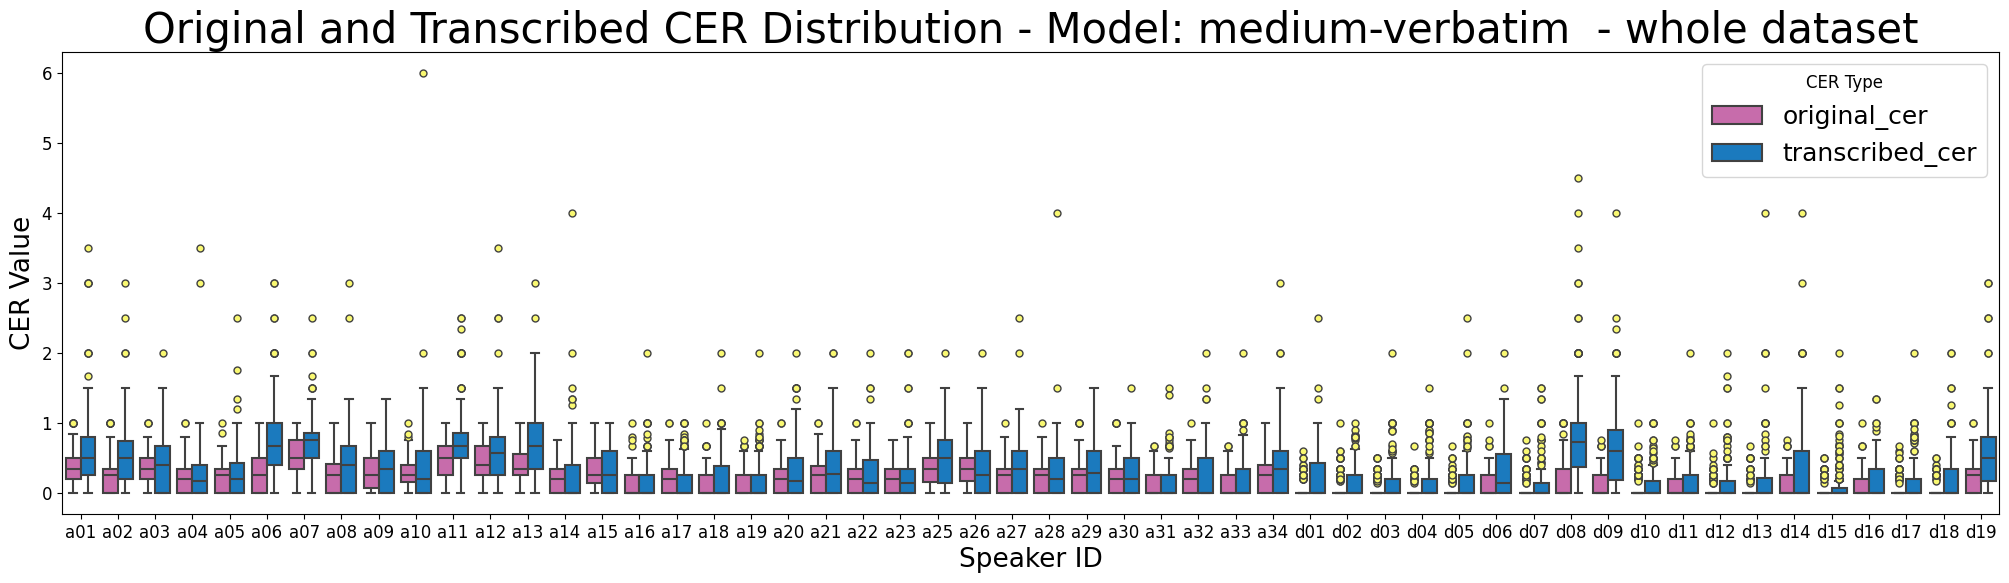

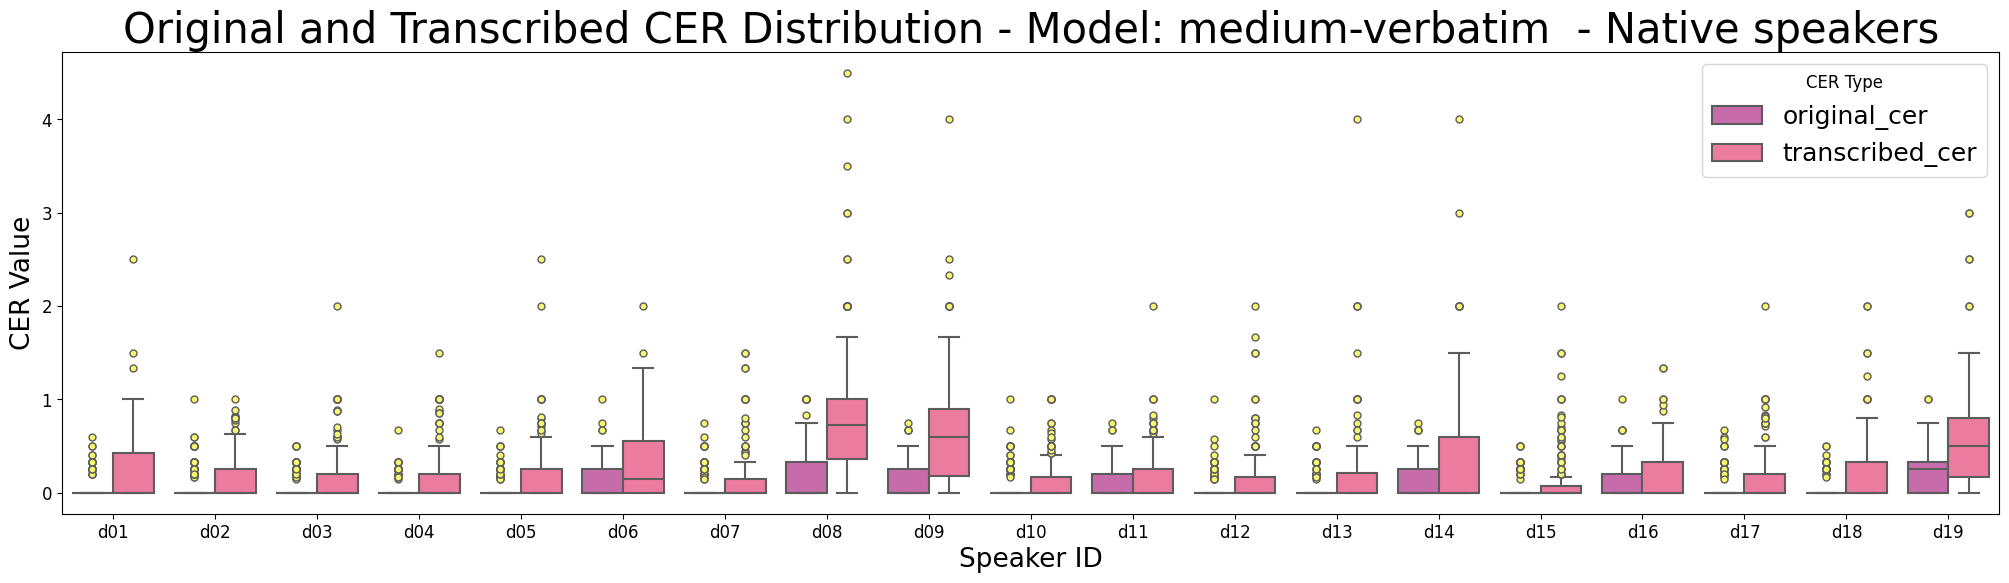

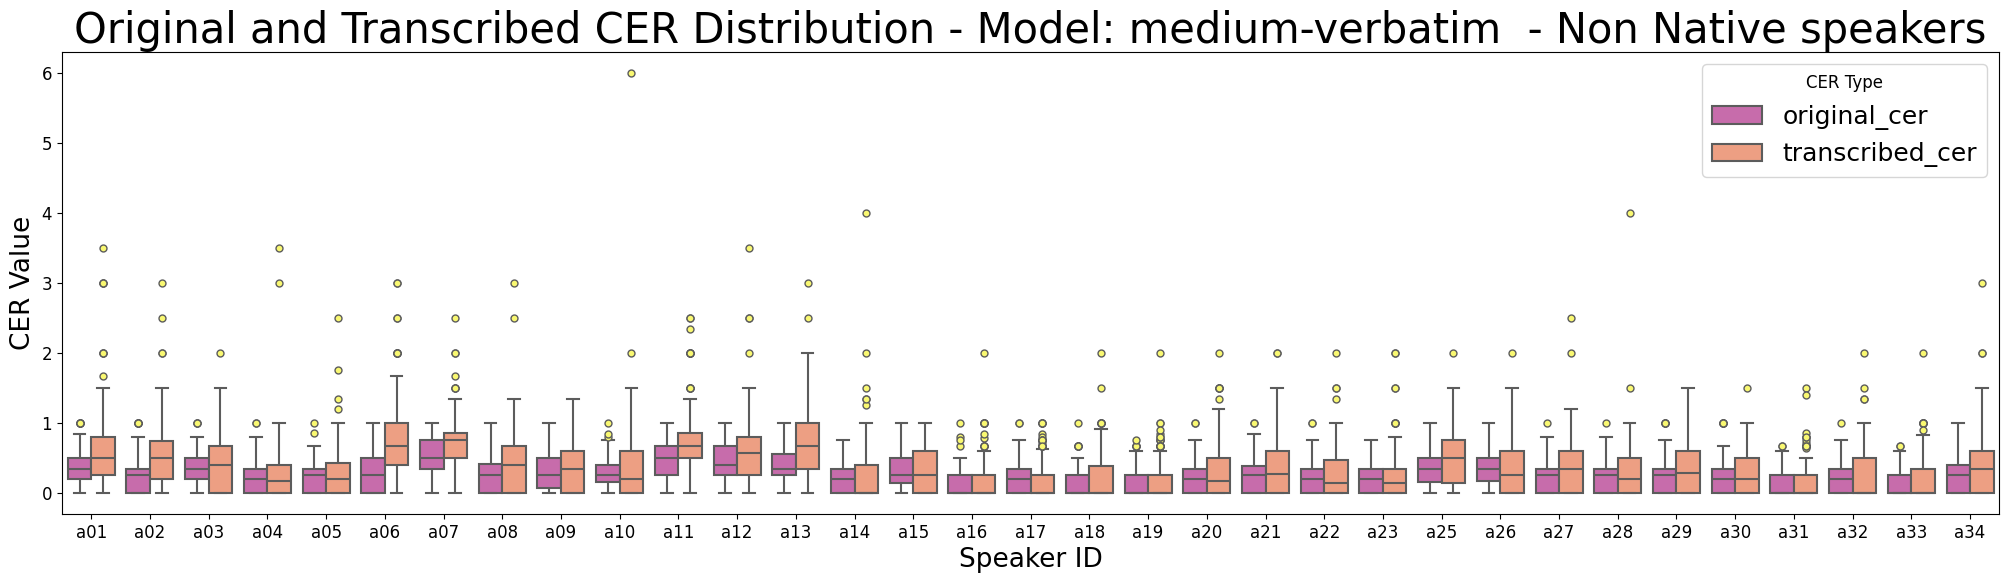

In [85]:
# big_boy_df = big_boy_df.sort_values(by='id')
big_df_verbatim = big_boy_df[big_boy_df['model_name'] == 'nb-medium-verbatim']
big_df_verbatim = big_df_verbatim.sort_values(by='id')

big_a_verbatim = big_df_verbatim[big_df_verbatim['id'].str.startswith('a')]
big_d_verbatim = big_df_verbatim[big_df_verbatim['id'].str.startswith('d')]

id_vars = ['id']
value_vars = ['original_cer', 'transcribed_cer']
var_name = 'cer_type'
value_name = 'cer_value'

df_melted = pd.melt(big_df_verbatim, id_vars=id_vars, value_vars=value_vars, 
                var_name=var_name, value_name=value_name) 
df_melted_a = pd.melt(big_a_verbatim, id_vars=id_vars, value_vars=value_vars, 
                var_name=var_name, value_name=value_name) 
df_melted_d = pd.melt(big_d_verbatim, id_vars=id_vars, value_vars=value_vars,
                var_name=var_name, value_name=value_name)

# ------------------------------------  BOX PLOT DEF --------------------------------------- #
def box_plot(df_melted:pd.DataFrame, name:str, save_dir_box_cer:str=save_dir_box_cer,  col:str=['#D65DB1', '#FF9671'], loc='best') :
    plt.figure(figsize=(25, 6))
    sns.boxplot(x='id', y='cer_value', data=df_melted, # the data parameter
                hue='cer_type', palette=col, linewidth=1.5, # Set the box colors and line width
                flierprops=dict(marker='o', markersize=5, markerfacecolor='#F9F871')) # fill the outliers

    plt.title(f'Original and Transcribed CER Distribution - Model: medium-verbatim  - {name}', fontsize=30) #,  color=col[1])

    plt.xlabel('Speaker ID', fontsize=19)
    plt.ylabel('CER Value', fontsize=19)
    plt.legend(title='CER Type', loc=loc, title_fontsize='large', fontsize=18)

    # # Wrap x-axis labels into multiple lines - From ChatGPT 
    # id = [ '\n'.join(wrap(label, 15)) for label in big_boy_df['id'].unique() ]
    # plt.xticks(ticks=range(len(id)), labels=id, fontsize=20)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()
    
    # save the plot to png
    # plt.savefig(os.path.join(save_dir_box_cer, f'BoxPlot_{name}.png')) # Did not work for some reason 
    pass

# ------------------------------------  BOX PLOT ALL --------------------------------------- #
box_plot(df_melted, name='whole dataset', col = ['#D65DB1', '#007ED9'])

# -----------------------------------  BOX PLOT Native [d] ------------------------------------ #
box_plot(df_melted_d, name='Native speakers', col = ['#D65DB1', '#FF6998'])

# ---------------------------------  BOX PLOT Non Native [a] ---------------------------------- #
box_plot(df_melted_a, name='Non Native speakers', col = ['#D65DB1', '#FF9671'])

### Score plot for vermatim-medium


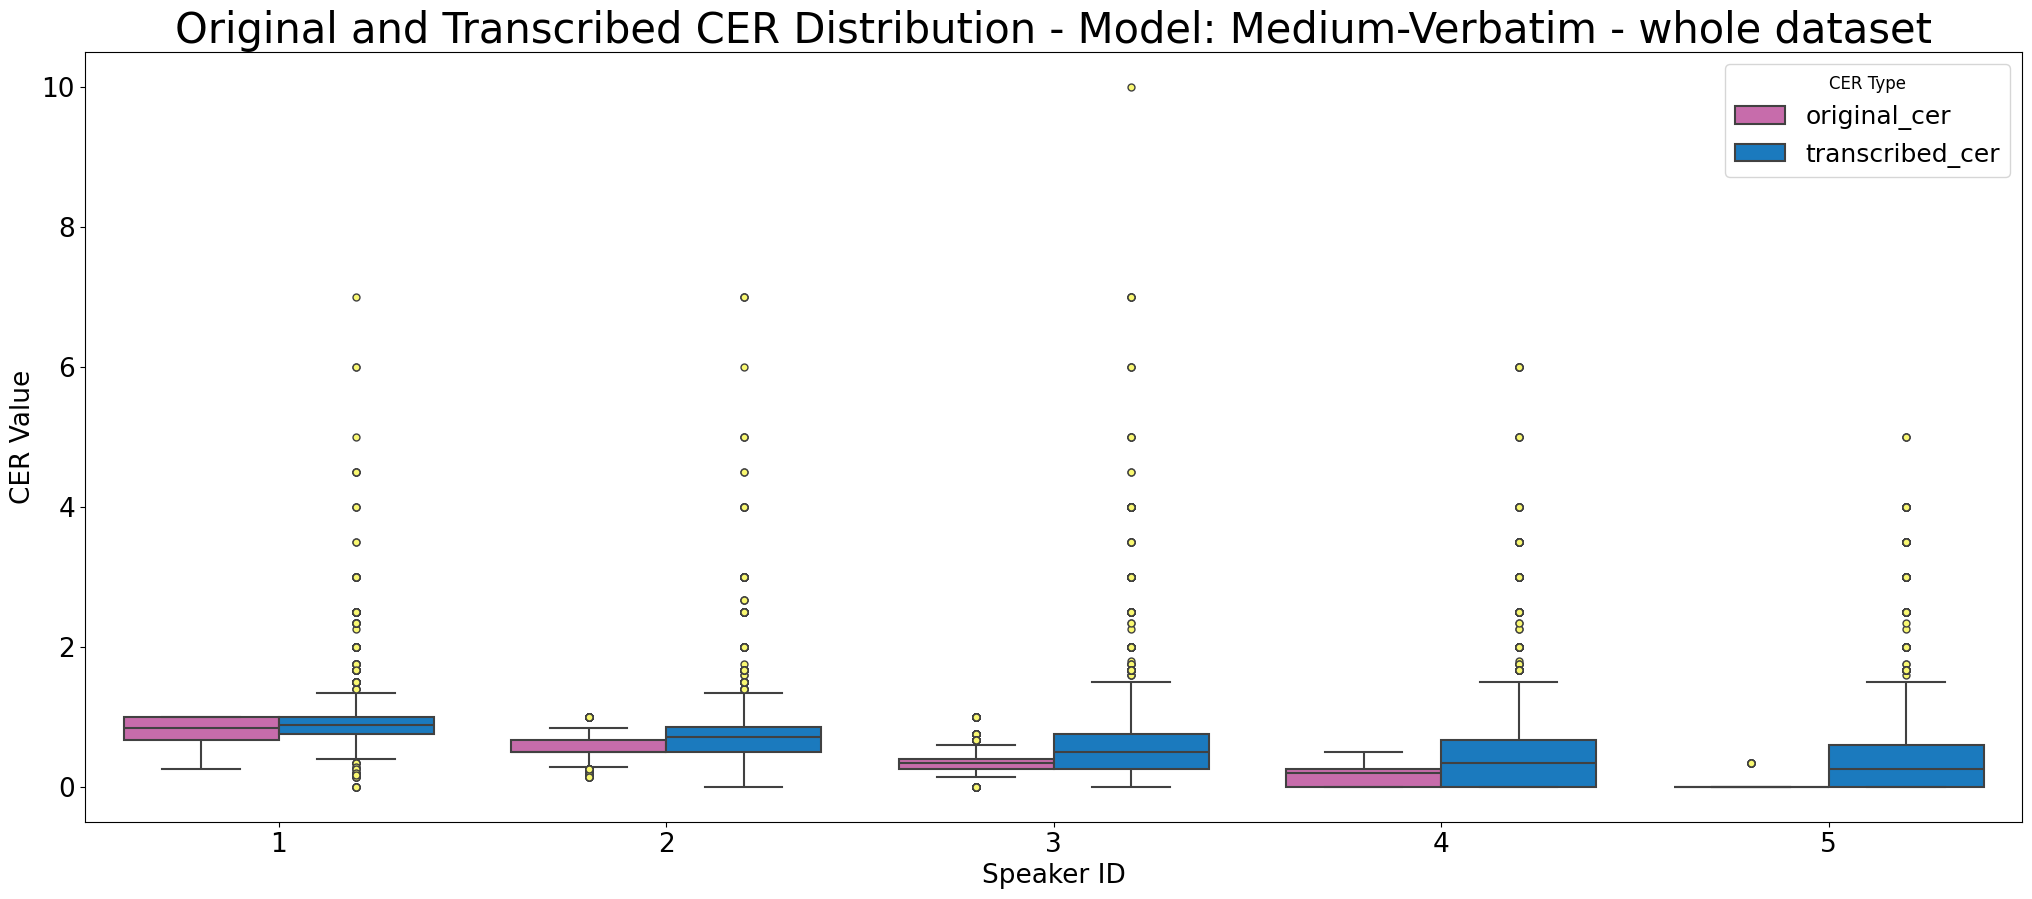

In [89]:
big_df_verbatim = big_boy_df[big_boy_df['model_name'] == 'nb-medium-verbatim']
big_df_verbatim = big_df_verbatim.sort_values(by='original_score')

big_a_verbatim = big_df_verbatim[big_df_verbatim['id'].str.startswith('a')]
big_d_verbatim = big_df_verbatim[big_df_verbatim['id'].str.startswith('d')]


id_vars = ['original_score']
value_vars = ['original_cer', 'transcribed_cer']
var_name = 'cer_type'
value_name = 'cer_value'

df_melted = pd.melt(big_boy_df, id_vars=id_vars, value_vars=value_vars, 
                var_name=var_name, value_name=value_name) 
df_melted_a = pd.melt(big_df_a, id_vars=id_vars, value_vars=value_vars, 
                var_name=var_name, value_name=value_name) 
df_melted_d = pd.melt(big_df_d, id_vars=id_vars, value_vars=value_vars,
                var_name=var_name, value_name=value_name)

# ------------------------------------  BOX PLOT DEF --------------------------------------- #
def box_plot(df_melted:pd.DataFrame, name:str, save_dir_box_cer:str=save_dir_box_cer,  col:str=['#D65DB1', '#FF9671'], loc='best') :
    plt.figure(figsize=(25, 10))
    sns.boxplot(x='original_score', y='cer_value', data=df_melted, # the data parameter
                hue='cer_type', palette=col, linewidth=1.5, # Set the box colors and line width
                flierprops=dict(marker='o', markersize=5, markerfacecolor='#F9F871')) # fill the outliers

    plt.title(f'Original and Transcribed CER Distribution - Model: Medium-Verbatim - {name}', fontsize=30) #,  color=col[1])

    plt.xlabel('Speaker ID', fontsize=19)
    plt.ylabel('CER Value', fontsize=19)
    plt.legend(title='CER Type', loc=loc, title_fontsize='large', fontsize=18)

    # Wrap x-axis labels into multiple lines - From ChatGPT 
    # model_names = [ '\n'.join(wrap(label, 15)) for label in big_boy_df['model_name'].unique() ]
    # plt.xticks(ticks=range(len(model_names)), labels=model_names, fontsize=20)
    plt.xticks(fontsize=19)
    plt.yticks(fontsize=19)
    plt.show()
    
    # save the plot to png
    # plt.savefig(os.path.join(save_dir_box_cer, f'BoxPlot_{name}.png')) # Did not work for some reason 
    pass

# ------------------------------------  BOX PLOT ALL --------------------------------------- #
box_plot(df_melted, name='whole dataset', col = ['#D65DB1', '#007ED9'])

#### Look

In [49]:
# for path in lst_path:
#     # print(f"File: {model_name}")
#     df_csv = pd.read_csv(path)
#     df_csv = df_csv.sort_values('id')
#     # ---------------------------------------  BOX PLOTS --------------------------------------- #
#     # ------------ Original and Transcribed CER, split into Native and Non - Native ------------ #
    
#     df_a = df_csv[df_csv['id'].str.startswith('a')] # Non - Native speakers
#     df_a = df_a.reset_index(drop=True)
#     half = df_a[df_a.id == 'a18'].index[0]
#     df_a = df_a.iloc[0:half]
    
#     # Get the correct model name
#     model_name = path.split('/')[-1].split('_')[-2]
#     if model_name.startswith('nb'):
#         model_name = model_name.split('-')
#         if len(model_name) > 3:
#             model_name = model_name[0] + '-' + model_name[2] + '-' + model_name[3]
#         else:
#             model_name = model_name[0] + '-' + model_name[2] 
#     df_a['model_name'] = model_name
    
#     # Concatenate the dataframes
#     big_boy_df = pd.concat([big_boy_df, df_a], ignore_index=True)
# # big_boy_df['model_name'].unique()

# # print(df_a)
# # # print(df_a[df_a.id == 'a18'])

# df_melted_a = pd.melt(big_boy_df, id_vars=['id'], value_vars=['original_cer', 'transcribed_cer'], 
#                 var_name='cer_type', value_name='cer_value') # Idea using melted from ChatGPT

# plt.figure(figsize=(24, 6))
# sns.boxplot(x='id', y='cer_value', data=df_melted_a, # the data parameter
#             hue='cer_type', palette=['#D65DB1', '#FF9671'], linewidth=1.5, # Set the box colors and line width
#             flierprops=dict(marker='o', markersize=5, markerfacecolor='#F9F871')) # fill the outliers

# plt.title(f'Original and Transcribed CER Distribution by Speaker - Non-Native Speakers for Model: {model_name}', fontsize=20)
# plt.xlabel('Speaker ID', fontsize=14)
# plt.ylabel('CER Value', fontsize=14)
# # plt.xticks(fontsize=16)
# plt.legend(title='CER Type', loc='upper left', title_fontsize='large', fontsize=16)

# # Wrap x-axis labels into multiple lines - From ChatGPT
# # from textwrap import wrap 
# # model_names = [ '\n'.join(wrap(label, 15)) for label in big_boy_df['model_name'].unique() ]
# # plt.xticks(ticks=range(len(model_names)), labels=model_names, fontsize=13)
# # plt.yticks(fontsize=13)


# plt.show()

In [40]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Initialize an empty DataFrame to store all data
# big_boy_df = pd.DataFrame()

# # Iterate over each path in lst_path (assuming lst_path contains paths to your CSV files)
# for path in lst_path:
#     model_name = path.split('/')[-1].split('_')[-2]
#     print(f"File: {model_name}")
    
#     df_csv = pd.read_csv(path)
#     df_csv = df_csv.sort_values('id')
    
#     df_a = df_csv[df_csv['id'].str.startswith('a')]  # Non-Native speakers
    
#     # Filter data accordingly
#     df_a = df_a.reset_index(drop=True)
#     half = df_a[df_a.id == 'a18'].index[0]
#     df_a = df_a.iloc[0:half]
    
#     # Add model_name column to df_a
#     df_a['model_name'] = model_name
    
#     # Concatenate df_a to big_boy_df
#     big_boy_df = pd.concat([big_boy_df, df_a], ignore_index=True)

# big_boy_df
# # # Melt big_boy_df
# # df_melted_a = pd.melt(big_boy_df, id_vars=['id', 'model_name'], value_vars=['original_cer', 'transcribed_cer'],
# #                       var_name='cer_type', value_name='cer_value')

# # # Plot the boxplot
# # plt.figure(figsize=(24, 6))
# # sns.boxplot(x='id', y='cer_value', hue='cer_type', data=df_melted_a, palette=['#D65DB1', '#FF9671'], linewidth=1.5,
# #             flierprops=dict(marker='o', markersize=5, markerfacecolor='#F9F871'))
# # plt.title(f'Original and Transcribed CER Distribution by Speaker - Non-Native Speakers', fontsize=20)
# # plt.xlabel('Speaker ID', fontsize=16)
# # plt.ylabel('CER Value', fontsize=16)
# # plt.legend(title='CER Type', loc='upper right', title_fontsize='large', fontsize=16)
# # plt.xticks(fontsize=16)
# # plt.yticks(fontsize=16)
# # plt.show()


# box_plot_dir_a = results_dir + '/BoxPlots/og_cer_vs_t_cer_non_native' # need to make
# box_plot_dir_a = results_dir + '/BoxPlots/og_cer_vs_t_cer_native' # need to make


In [ ]:
    # df_d = df_csv[df_csv['id'].str.startswith('d')] # Native speakers
    # df_melted_d = pd.melt(df_d, id_vars=['id'], value_vars=['original_cer', 'transcribed_cer'], 
    #                 var_name='cer_type', value_name='cer_value')    
    # plt.figure(figsize=(24, 6))
    # sns.boxplot(x='id', y='cer_value', hue='cer_type', data=df_melted_d, palette=['skyblue', 'lightgreen'])
    # plt.title(f'Original and Transcribed CER Distribution by Speaker - Native Speakers for Model: {model_name}')
    # plt.xlabel('Speaker ID')
    # plt.ylabel('CER Value')
    # plt.legend(title='CER Type', loc='upper right', labels=['Original CER', 'Transcribed CER'], fontsize=12)
    # plt.show()
    
    
    
    # CER than teh derivation in word length for each score, and then each id, then each model
    # To understand the Error distribution plot CER for each score
    # Make box plot
    # Box plot - CER for each score transcribed and original
    
    
    
    # plt.figure(figsize=(20, 6))

    # sns.boxplot(x='id', y='original_cer', data=df_csv, color='skyblue')
    # sns.boxplot(x='id', y='transcribed_cer', data=df_csv, color='lightgreen')
    # plt.title('Original and Transcribed CER Distribution by Speaker')
    # plt.xlabel('Speaker ID')
    # plt.ylabel('CER Value')

    # # Adding legend
    # plt.legend(labels=['Original CER', 'Transcribed CER'], title='CER Type', loc='upper right')

    
    
    
    # for score, df_score in df_score_group:
    #     print(f"Score: {score}")
        
        
        
    #     break
    
    # break

# Can also make a csv file wiht the results form all the diffretn scores insted of each model

### <span style="color:#da6db9"> Category:<b> Score 1 </span></b>

## <b><span style="color:#FF6F91"> Empty Transcriptions </span></b>

* Compare the <b>empty transcription</b> files to the results of the <b> concatenated audio </b> file results.


<b><span style="color:#ff6f91">ff6f91</span></b>	
<b><span style="color:#e66483">e66483</span></b>	
<b><span style="color:#cc5974">cc5974</span></b>	
<b><span style="color:#b34e66">b34e66</span></b>	
<b><span style="color:#994357">994357</span></b>	
<b><span style="color:#803849">803849</span></b>	
<b><span style="color:#662c3a">662c3a</span></b>

<b><span style="color:#ff6f91">ff6f91</span></b>	
<b><span style="color:#ff7d9c">ff7d9c</span></b>	
<b><span style="color:#ff8ca7">ff8ca7</span></b>	
<b><span style="color:#ff9ab2">ff9ab2</span></b>	
<b><span style="color:#ffa9bd">ffa9bd</span></b>	
<b><span style="color:#ffb7c8">ffb7c8</span></b>	
<b><span style="color:#ffc5d3">ffc5d3</span></b>

## <b><span style="color:#FF9671"> Concatenated audio </span></b>

The concatenated audio did not have any completely empty transcriptions, but it did have some transcriptions with very few or many words. 


<b><span style="color:#ff9671">ff9671</span></b>
<b><span style="color:#ff9f7b">ff9f7b</span></b>
<b><span style="color:#ffa885">ffa885</span></b>
<b><span style="color:#ffb28f">ffb28f</span></b>
<b><span style="color:#ffb999">ffb999</span></b>
<b><span style="color:#ffc2a3">ffc2a3</span></b>
<b><span style="color:#ffccad">ffccad</span></b>

tiny
tiny__concatenated_audio_information_scores_id_sorted_v1.csv


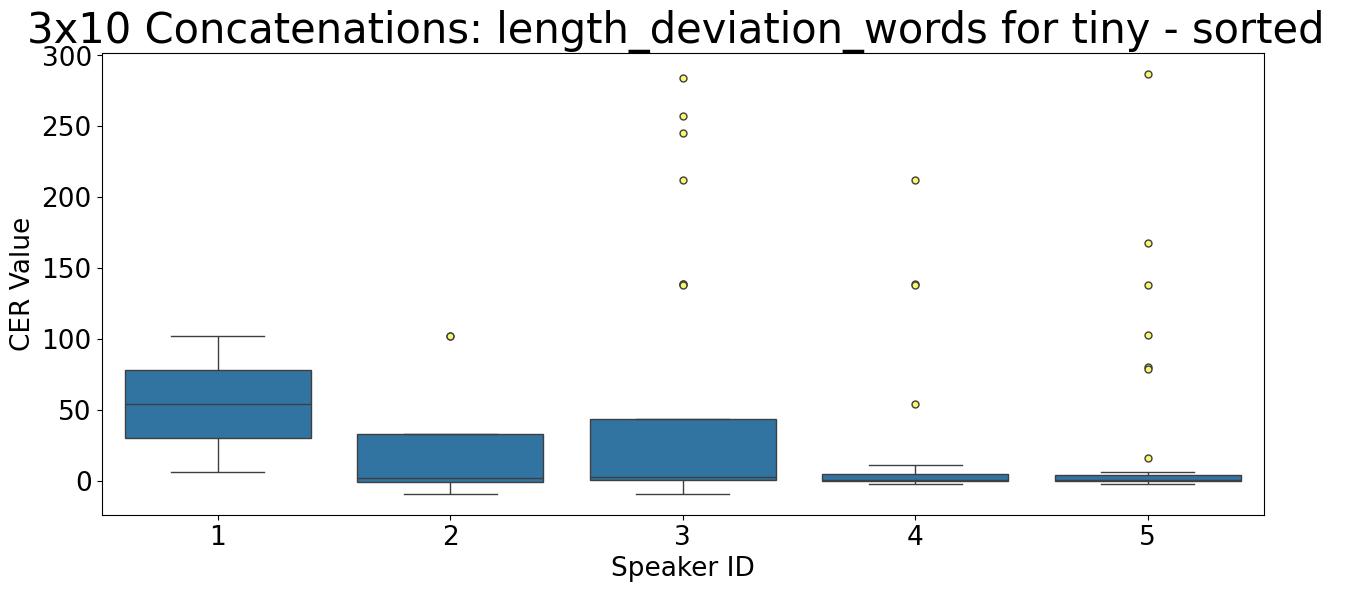

tiny
tiny__concatenated_audio_information_scores_id_mixed_v1.csv


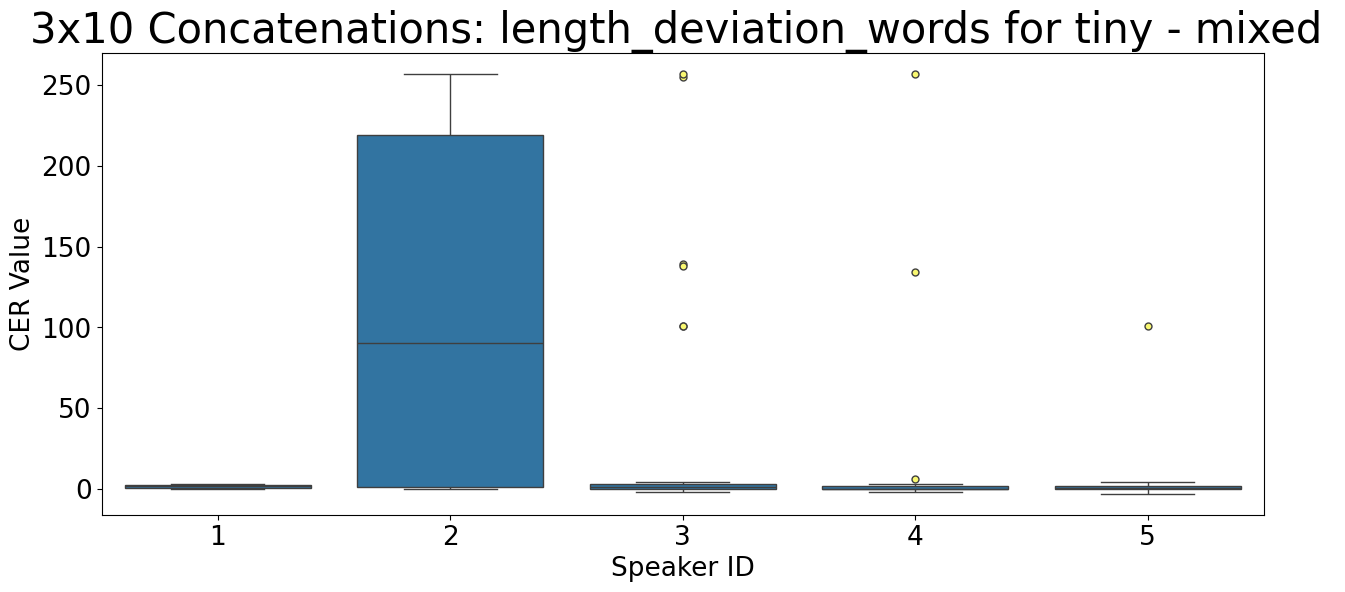

nb-whisper-tiny
nb-whisper-tiny__concatenated_audio_information_scores_id_sorted_v1.csv


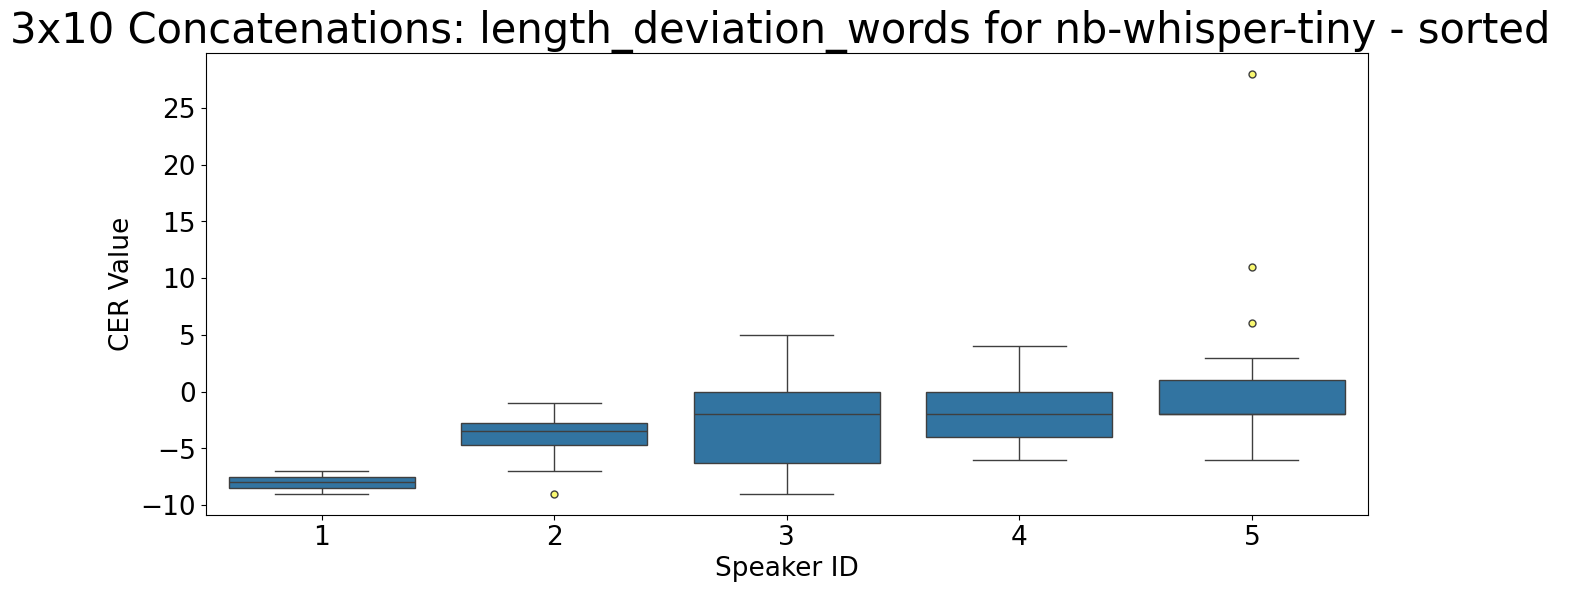

nb-whisper-tiny
nb-whisper-tiny__concatenated_audio_information_scores_id_mixed_v1.csv


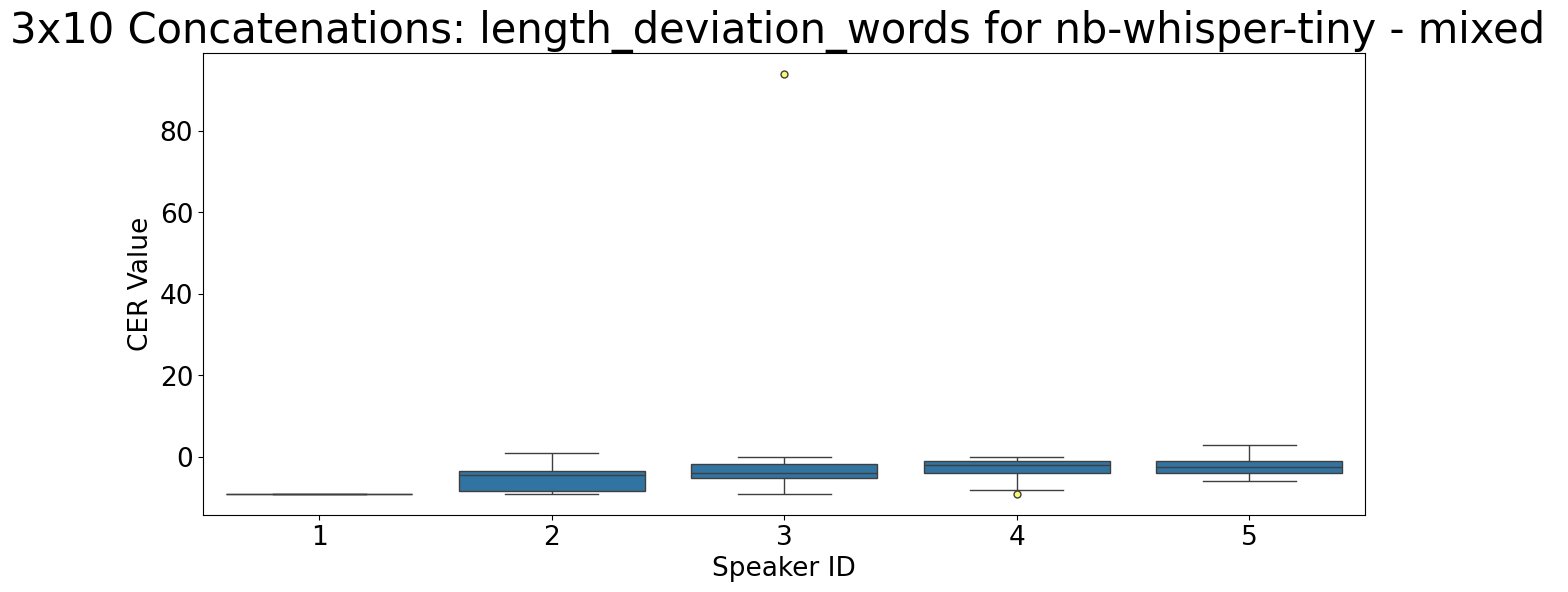

nb-whisper-tiny-verbatim
nb-whisper-tiny-verbatim__concatenated_audio_information_scores_id_sorted_v1.csv


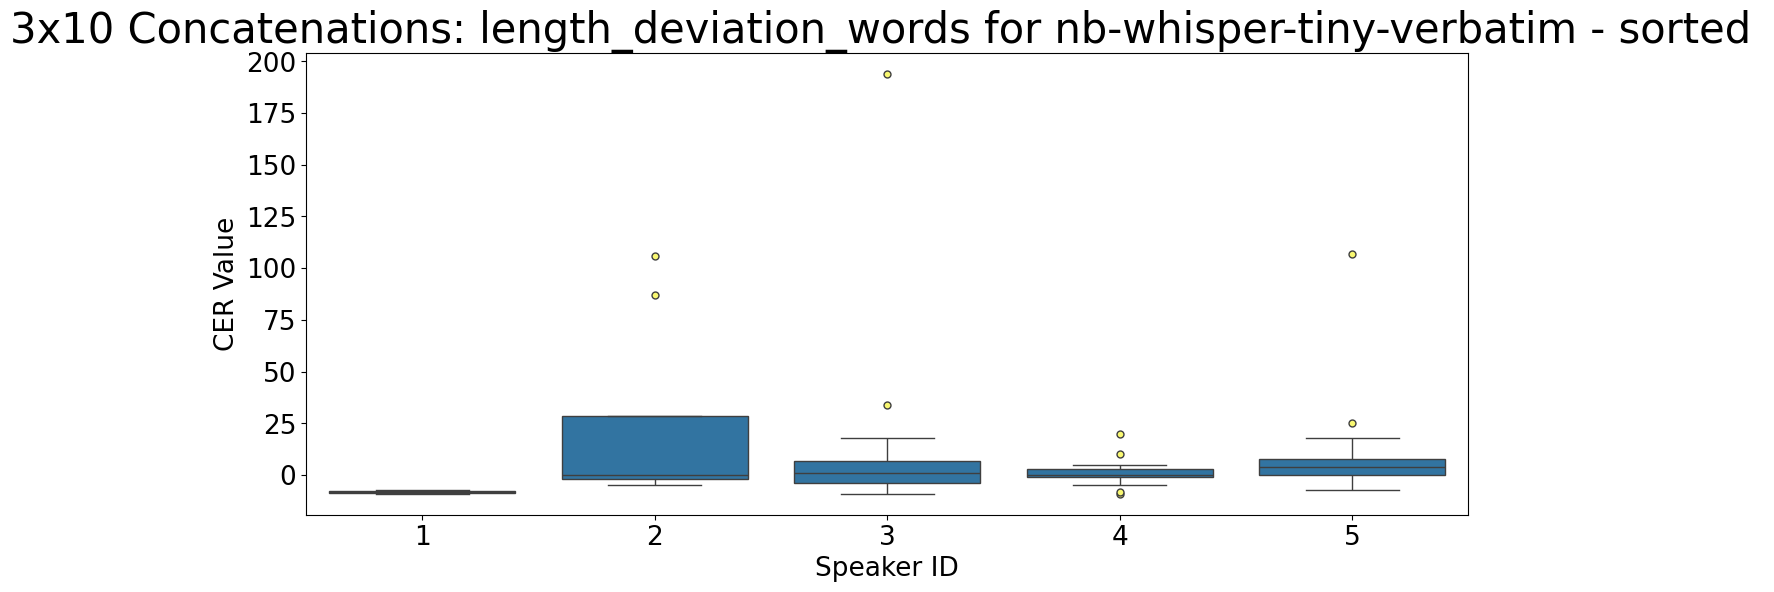

nb-whisper-tiny-verbatim
nb-whisper-tiny-verbatim__concatenated_audio_information_scores_id_mixed_v1.csv


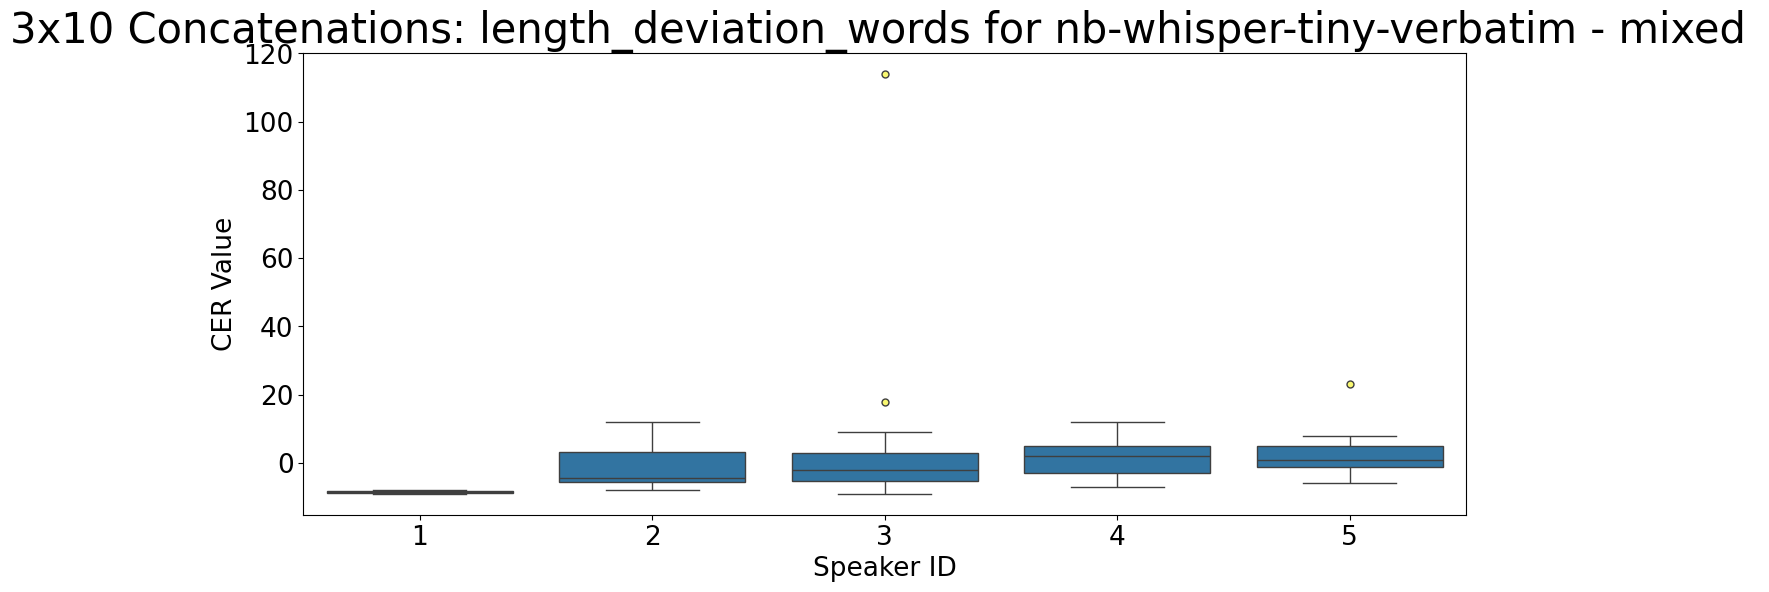

base
base__concatenated_audio_information_scores_id_sorted_v1.csv


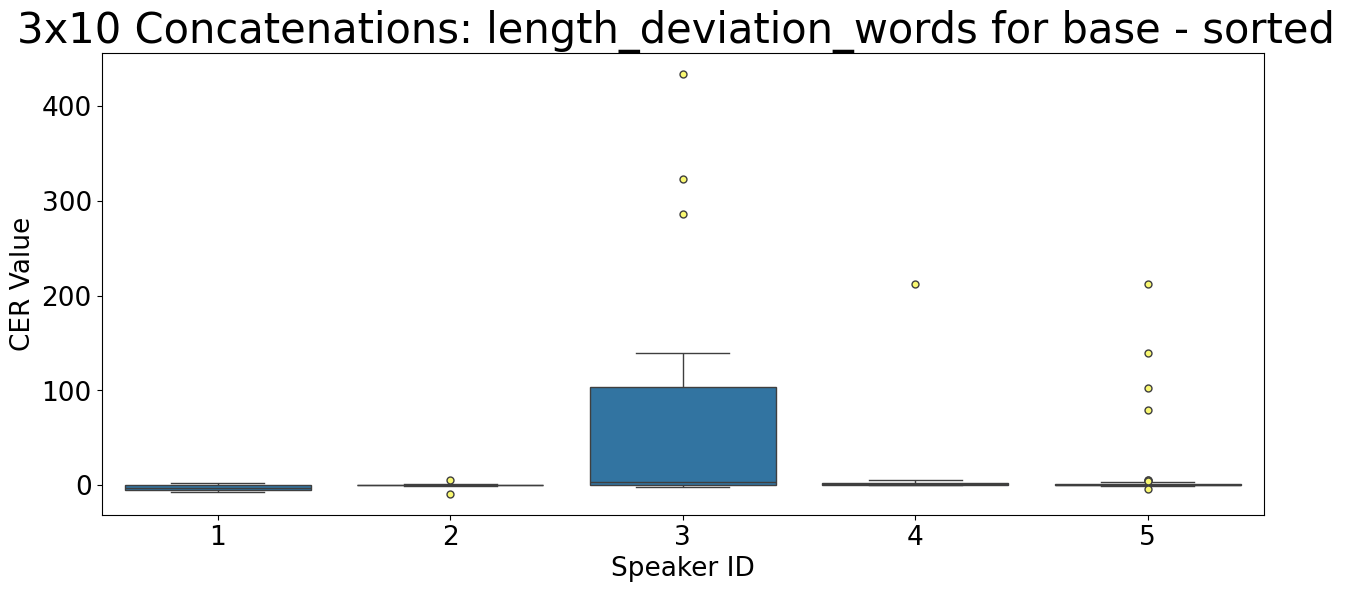

base
base__concatenated_audio_information_scores_id_mixed_v1.csv


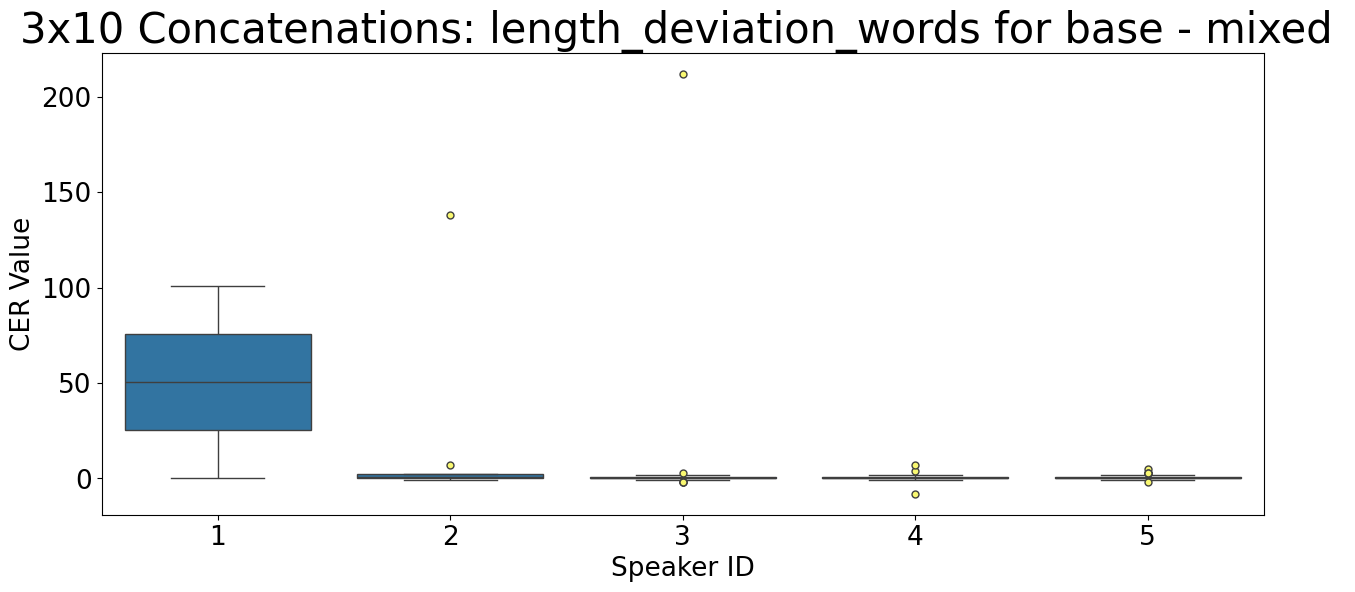

nb-whisper-base
nb-whisper-base__concatenated_audio_information_scores_id_sorted_v1.csv


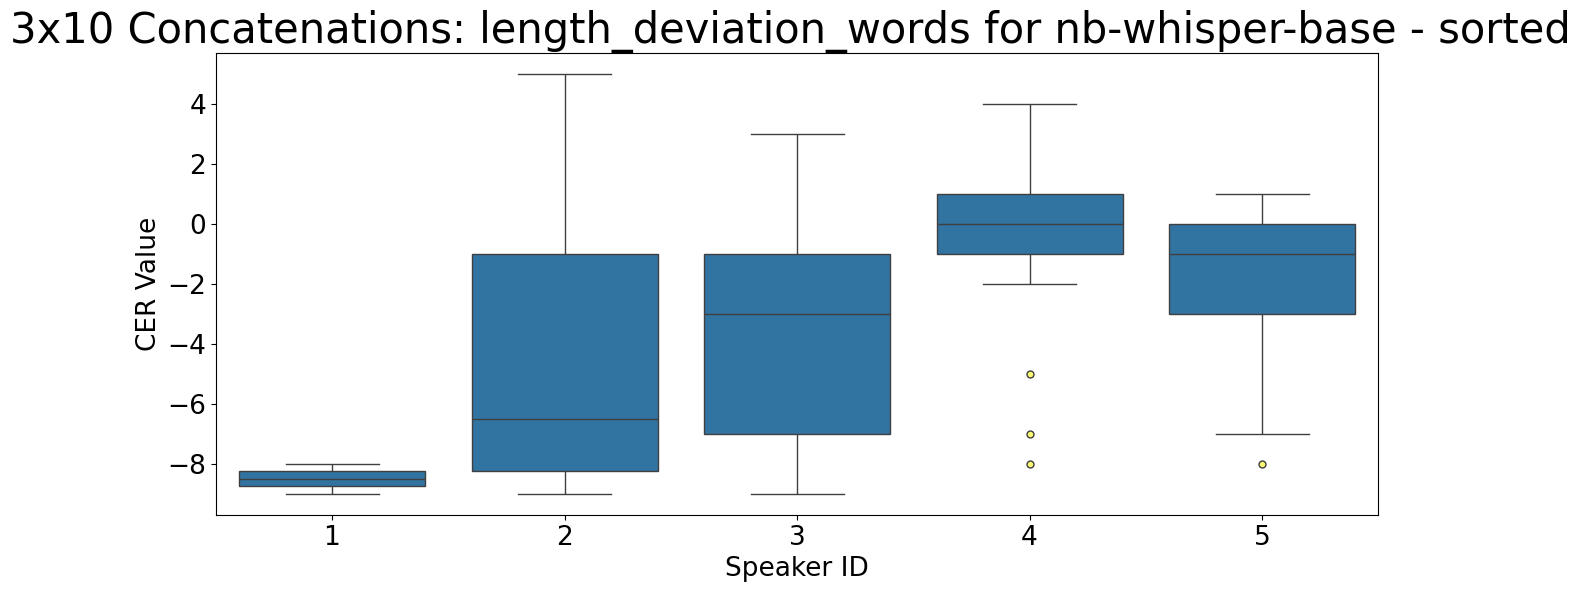

nb-whisper-base
nb-whisper-base__concatenated_audio_information_scores_id_mixed_v1.csv


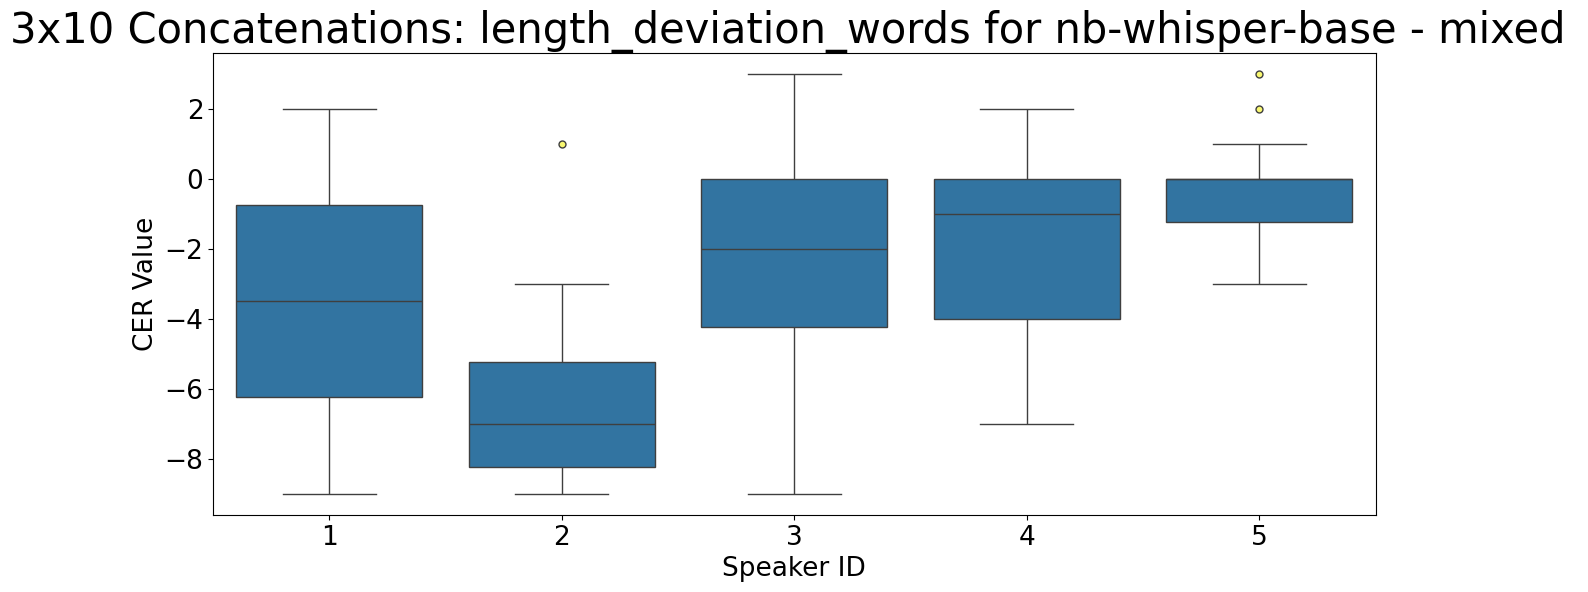

nb-whisper-base-verbatim
nb-whisper-base-verbatim__concatenated_audio_information_scores_id_sorted_v1.csv


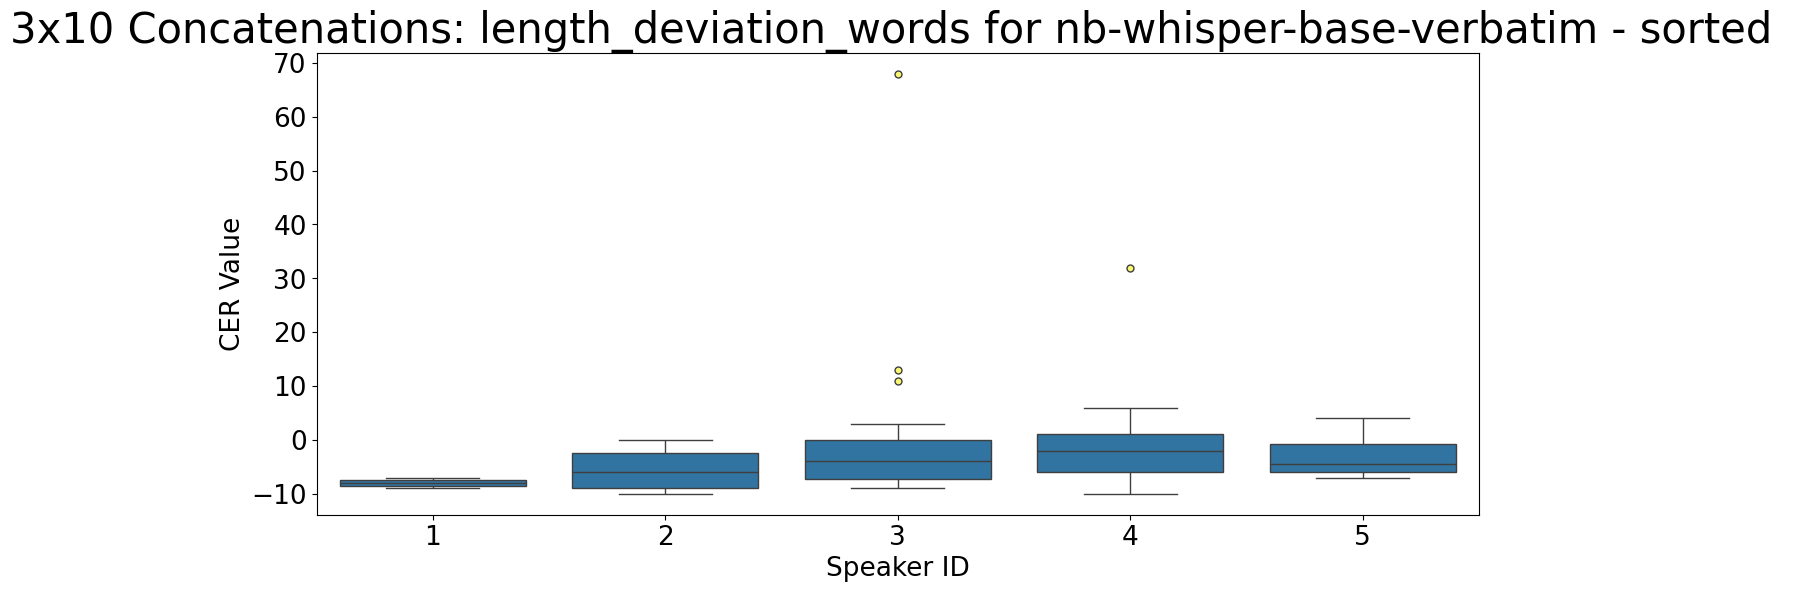

nb-whisper-base-verbatim
nb-whisper-base-verbatim__concatenated_audio_information_scores_id_mixed_v1.csv


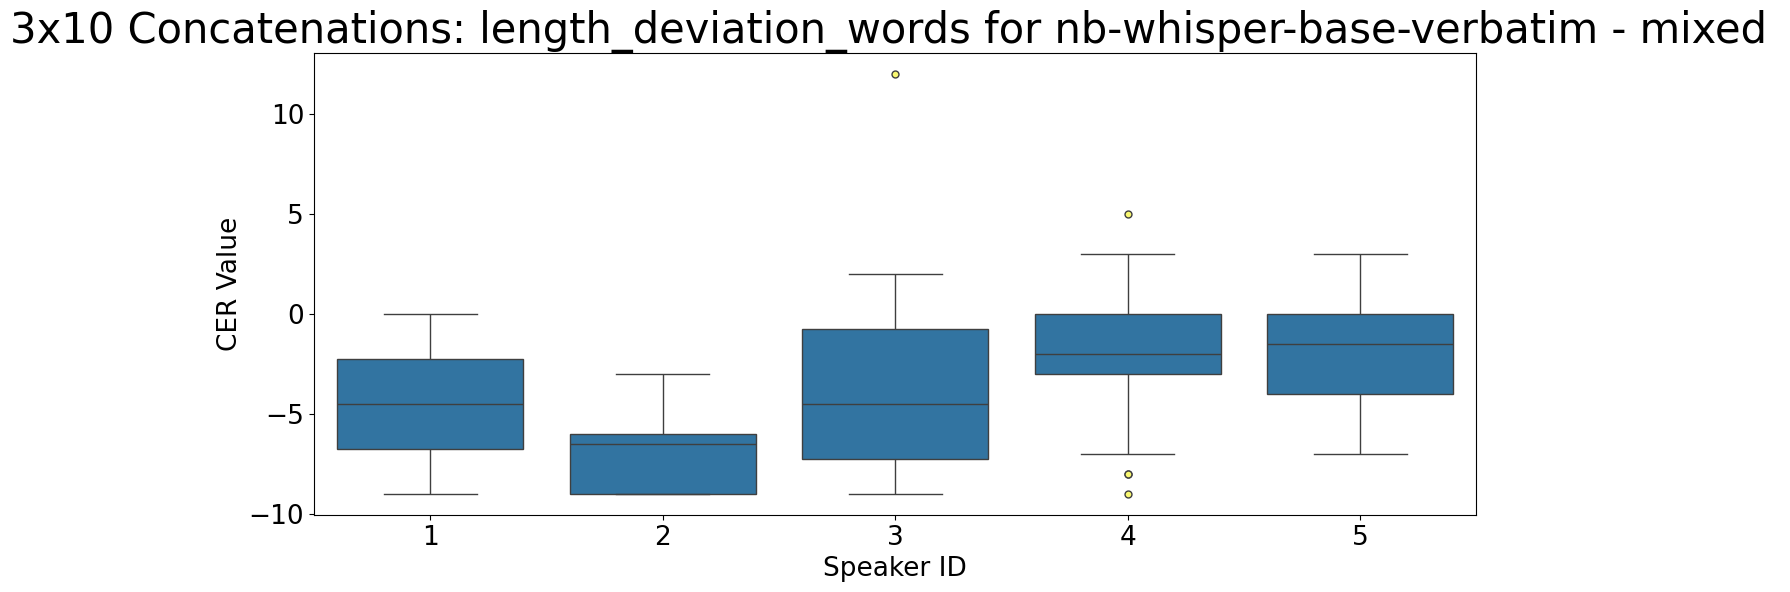

medium
medium__concatenated_audio_information_scores_id_sorted_v1.csv


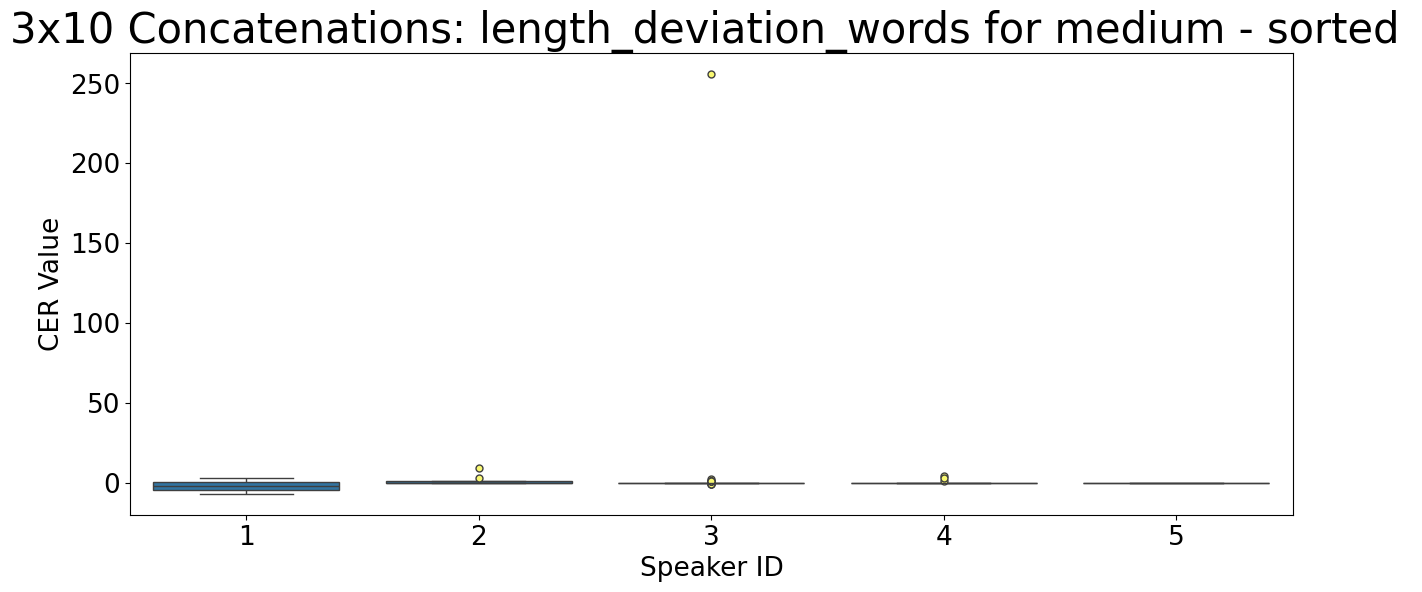

medium
medium__concatenated_audio_information_scores_id_mixed_v1.csv


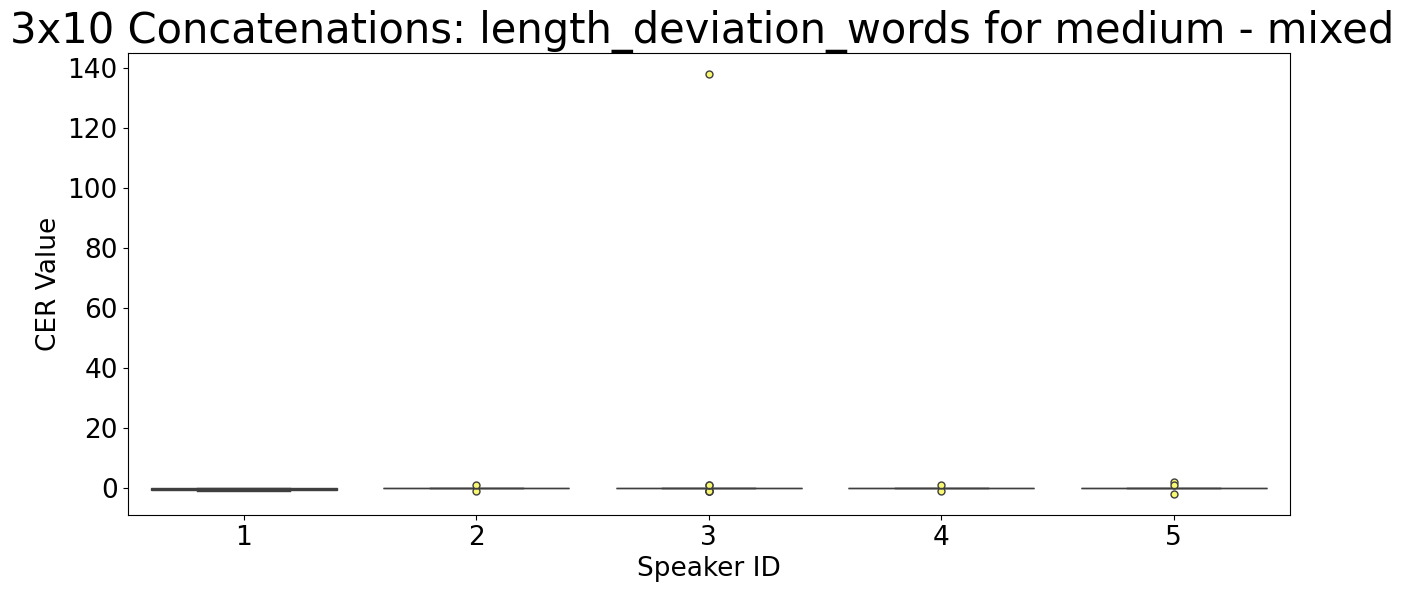

nb-whisper-medium
nb-whisper-medium__concatenated_audio_information_scores_id_sorted_v1.csv


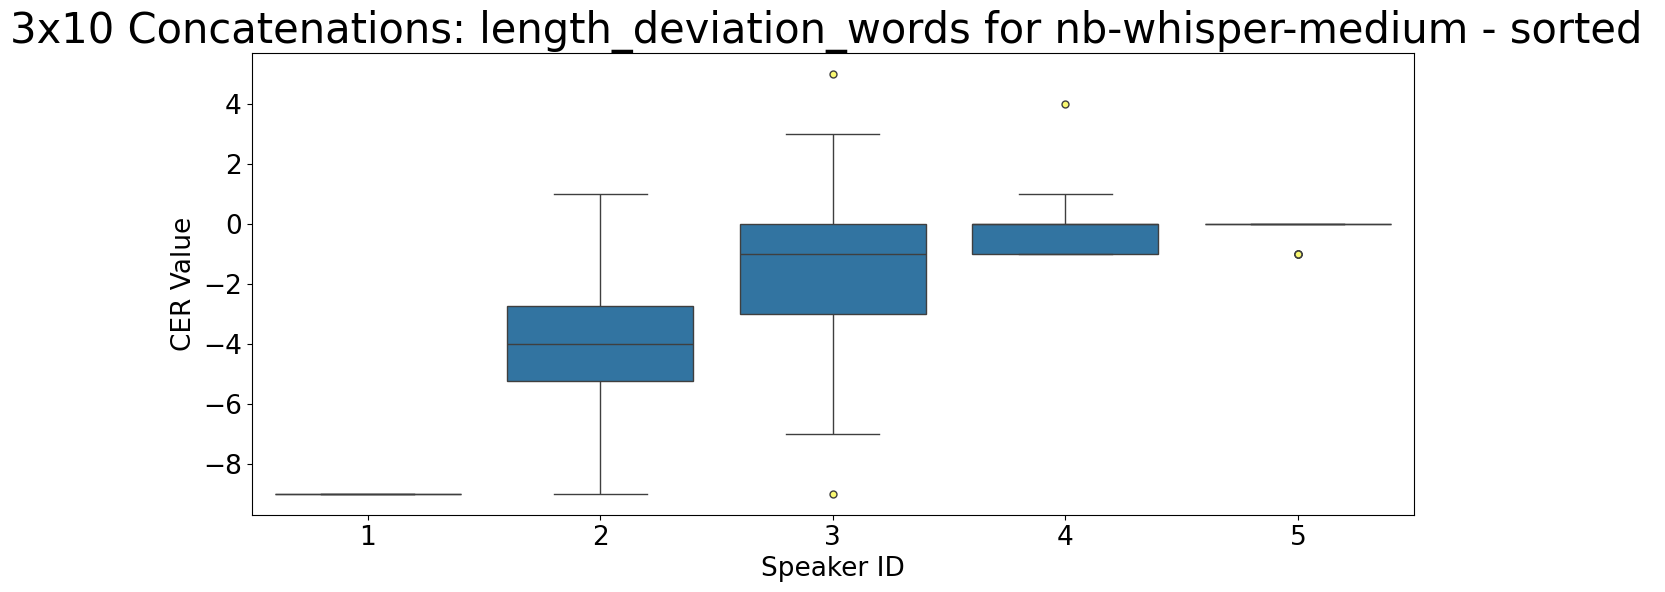

nb-whisper-medium
nb-whisper-medium__concatenated_audio_information_scores_id_mixed_v1.csv


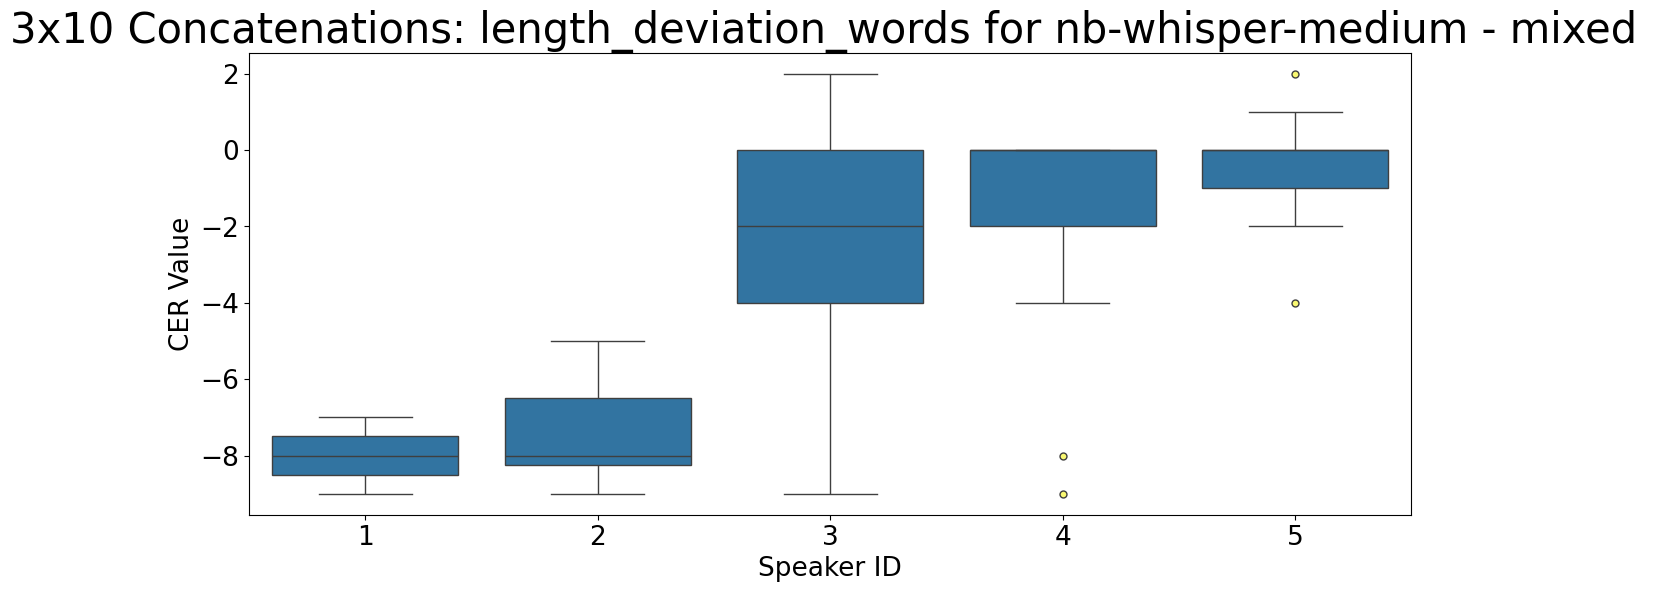

nb-whisper-medium-verbatim
nb-whisper-medium-verbatim__concatenated_audio_information_scores_id_sorted_v1.csv


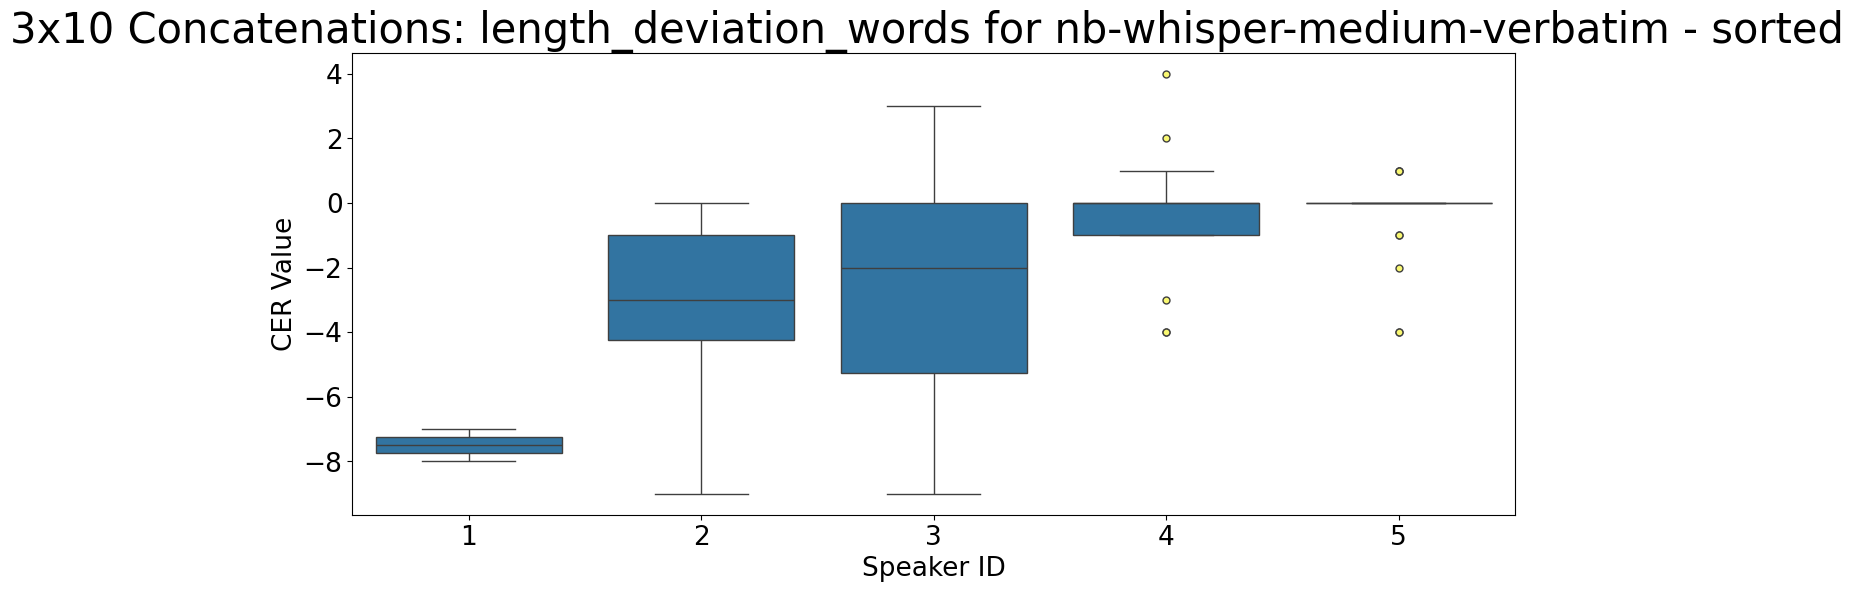

nb-whisper-medium-verbatim
nb-whisper-medium-verbatim__concatenated_audio_information_scores_id_mixed_v1.csv


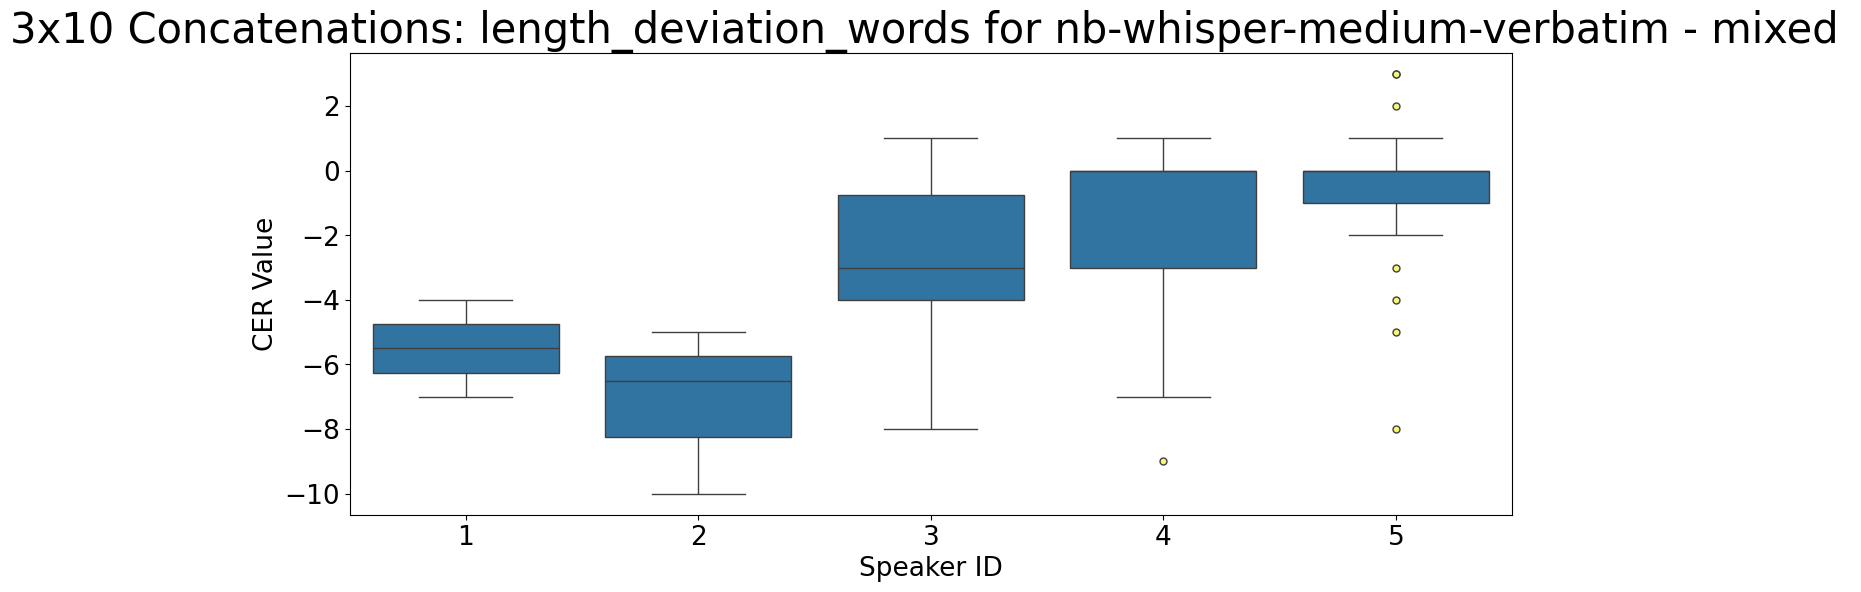

In [116]:
information_dir = './3x10_Concatenation_information'
lst_3x10 = os.listdir(information_dir)
lst_3x10 = [file for file in lst_3x10 if file.endswith('v1.csv')]
lst_model_name = [name.split('_')[1] for name in lst_csv]

models = ['tiny', 'nb-whisper-tiny', 'nb-whisper-tiny-verbatim',
        'base', 'nb-whisper-base', 'nb-whisper-base-verbatim',
        'medium', 'nb-whisper-medium', 'nb-whisper-medium-verbatim']

lst_3x10.sort(key=lambda s: models.index(s.split('__')[0]))

lst_scores_id_sorted = [file for file in lst_3x10 if file.endswith('scores_id_sorted_v1.csv')]
lst_scores_id_mixed = [file for file in lst_3x10 if file.endswith('scores_id_mixed_v1.csv')]
lst_no_group_mixed = [file for file in lst_3x10 if file.endswith('no_group_mixed_v1.csv')]
lst_group_id_sorted_score = [file for file in lst_3x10 if file.endswith('group_id_sorted_score_v1.csv')]


mega_df = pd.DataFrame()

for path in lst_3x10:
        if path.endswith('no_group_mixed_v1.csv') or path.endswith('group_id_sorted_score_v1.csv'):
                continue
        
        df_3x10 = pd.read_csv(os.path.join(information_dir, path))
        model_name = path.split('__')[0]
        
        df_3x10['model_name'] = model_name
        mega_df = pd.concat([mega_df, df_3x10], ignore_index=True)
        
        status = path.split('_')[-2]
        
        print(model_name)
        # # Box plot of length_deviation_words for each model
        print(path)
        plt.figure(figsize=(15, 6))
        sns.boxplot(x='score', y='length_deviation_words', data=df_3x10, # the data parameter
                        # hue='cer_type', palette=['#D65DB1', '#FF9671'], linewidth=1.5, # Set the box colors and line width
                        flierprops=dict(marker='o', markersize=5, markerfacecolor='#F9F871')) # fill the outliers

        plt.title(f'3x10 Concatenations: length_deviation_words for {model_name} - {status} ', fontsize=30) #,  color=col[1])

        plt.xlabel('Speaker ID', fontsize=19)
        plt.ylabel('CER Value', fontsize=19)
        plt.xticks(fontsize=19)
        plt.yticks(fontsize=19)
        plt.show()
    
    
    # # Box plot for length_deviation_words for one model but all the scores
    # # Box plot for length_deviation_words for one model but 





In [117]:
mega_df.model_name.unique()

array(['tiny', 'nb-whisper-tiny', 'nb-whisper-tiny-verbatim', 'base',
       'nb-whisper-base', 'nb-whisper-base-verbatim', 'medium',
       'nb-whisper-medium', 'nb-whisper-medium-verbatim'], dtype=object)

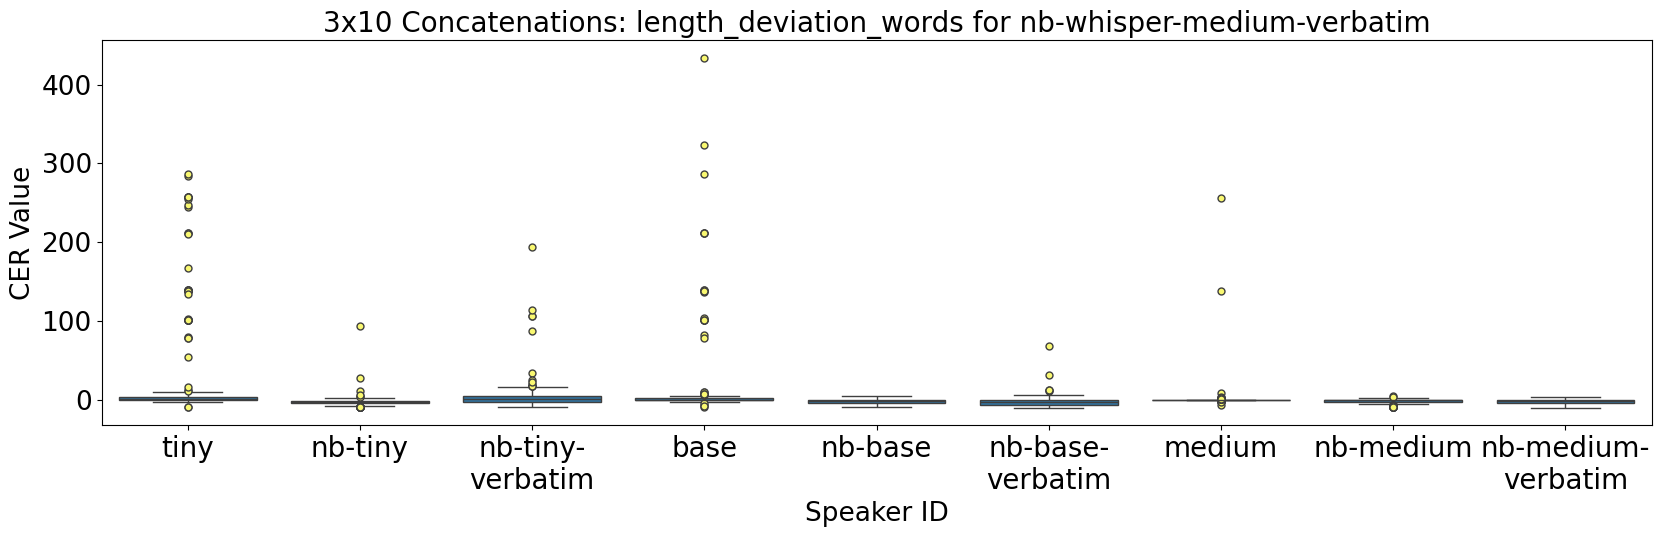

In [109]:
# remove rows whit model name tiny, base and medium
data = mega_df[mega_df['model_name'].str.contains('tiny|base|medium')]

plt.figure(figsize=(20, 5))
sns.boxplot(x='model_name', y='length_deviation_words', data=mega_df, # the data parameter
            # hue='cer_type', palette=['#D65DB1', '#FF9671'], linewidth=1.5, # Set the box colors and line width
            flierprops=dict(marker='o', markersize=5, markerfacecolor='#F9F871')) # fill the outliers

plt.title(f'3x10 Concatenations: length_deviation_words for {model_name}', fontsize=20) #,  color=col[1])

plt.xlabel('Speaker ID', fontsize=19)
plt.ylabel('CER Value', fontsize=19)
# plt.legend(title='CER Type', loc=loc, title_fontsize='large', fontsize=18)

# Wrap x-axis labels into multiple lines - From ChatGPT 
model_names = [ '\n'.join(wrap(label, 15)) for label in big_boy_df['model_name'].unique() ]
plt.xticks(ticks=range(len(model_names)), labels=model_names, fontsize=20)
# plt.xticks(fontsize=19)
plt.yticks(fontsize=19)
plt.show()

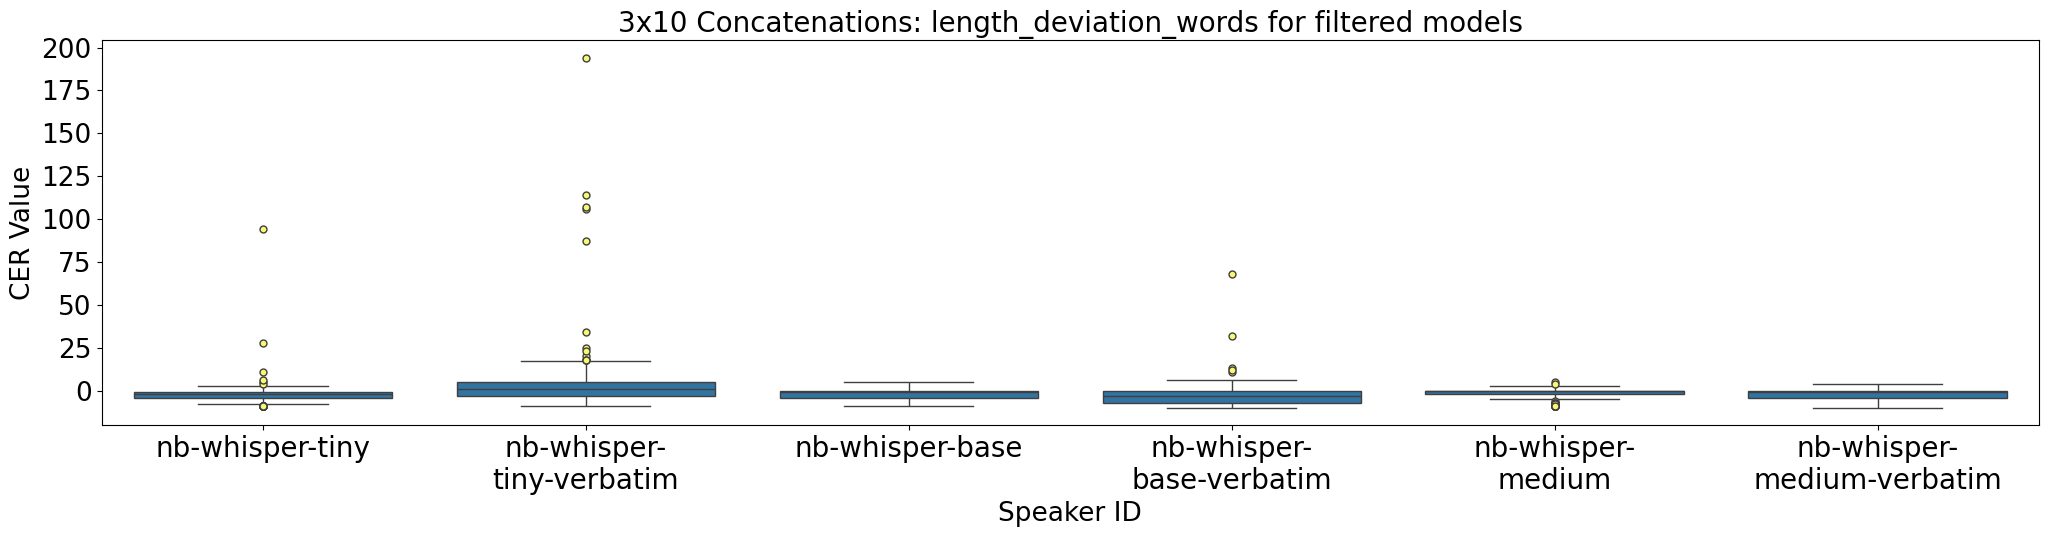

In [122]:
# Filter the dataframe
filtered_mega_df = mega_df[mega_df['model_name'] != 'tiny']
filtered_mega_df = filtered_mega_df[filtered_mega_df['model_name'] != 'base']
filtered_mega_df = filtered_mega_df[filtered_mega_df['model_name'] != 'medium']

data = filtered_mega_df

# Plotting
plt.figure(figsize=(25, 5))
sns.boxplot(x='model_name', y='length_deviation_words', data=data,
            flierprops=dict(marker='o', markersize=5, markerfacecolor='#F9F871'))  # fill the outliers

# Setting the title with model_name variable
plt.title('3x10 Concatenations: length_deviation_words for filtered models', fontsize=20)

plt.xlabel('Speaker ID', fontsize=19)
plt.ylabel('CER Value', fontsize=19)

# Wrap x-axis labels into multiple lines
model_names = ['\n'.join(wrap(label, 15)) for label in data['model_name'].unique()]
plt.xticks(ticks=range(len(model_names)), labels=model_names, fontsize=20)
plt.yticks(fontsize=19)

# Show plot
plt.show()

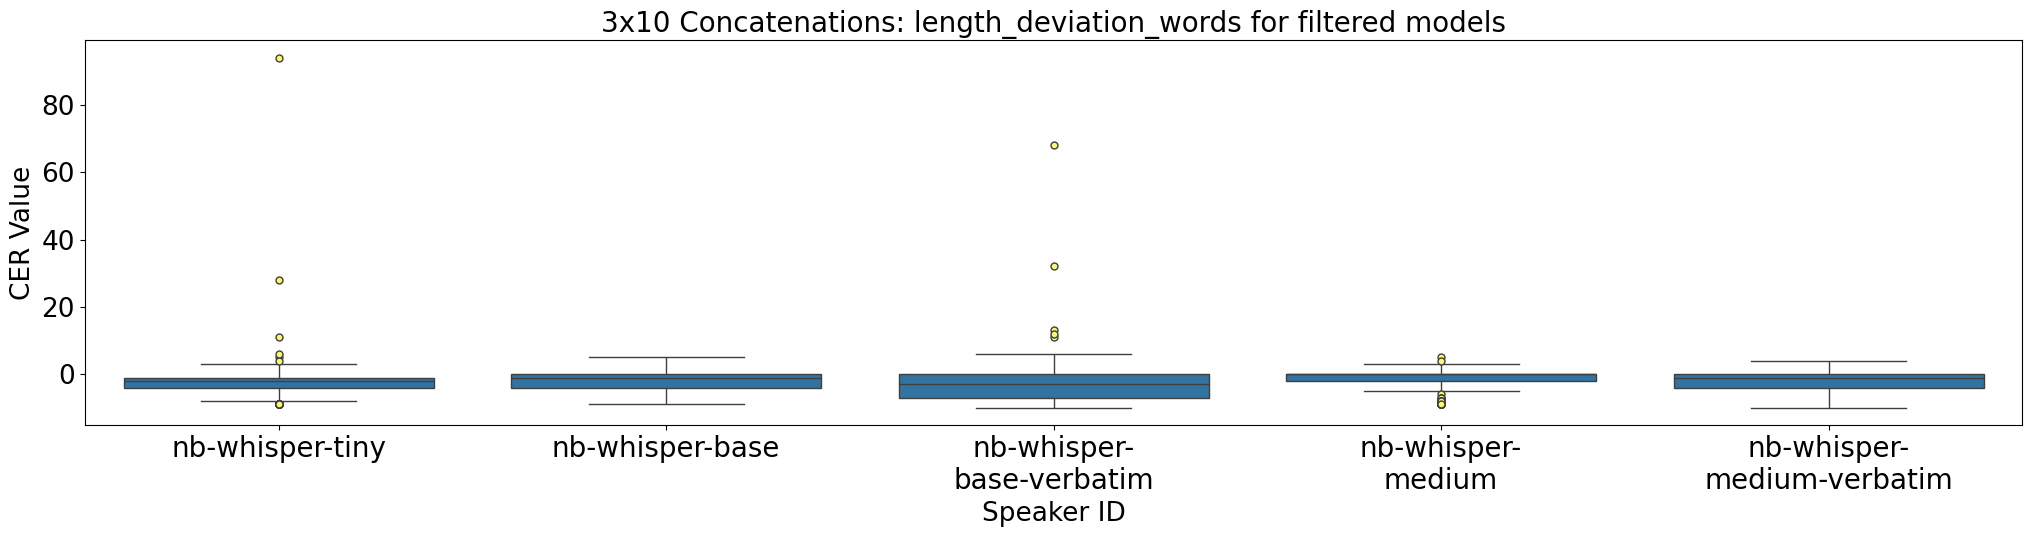

In [123]:
# Filter the dataframe
filtered_mega_df = mega_df[mega_df['model_name'] != 'tiny']
filtered_mega_df = filtered_mega_df[filtered_mega_df['model_name'] != 'base']
filtered_mega_df = filtered_mega_df[filtered_mega_df['model_name'] != 'medium']
filtered_mega_df = filtered_mega_df[filtered_mega_df['model_name'] != 'nb-whisper-tiny-verbatim']

data = filtered_mega_df

# Plotting
plt.figure(figsize=(25, 5))
sns.boxplot(x='model_name', y='length_deviation_words', data=data,
            flierprops=dict(marker='o', markersize=5, markerfacecolor='#F9F871'))  # fill the outliers

# Setting the title with model_name variable
plt.title('3x10 Concatenations: length_deviation_words for filtered models', fontsize=20)

plt.xlabel('Speaker ID', fontsize=19)
plt.ylabel('CER Value', fontsize=19)

# Wrap x-axis labels into multiple lines
model_names = ['\n'.join(wrap(label, 15)) for label in data['model_name'].unique()]
plt.xticks(ticks=range(len(model_names)), labels=model_names, fontsize=20)
plt.yticks(fontsize=19)

# Show plot
plt.show()

In [129]:
nwmv = 'nb-whisper-medium-verbatim'
nw_m = 'nb-whisper-medium'

nwmv = mega_df[mega_df['model_name'] == nwmv]
nw_m = mega_df[mega_df['model_name'] == nw_m]

# find how many rows has 0 in length_deviation_words
nwmv['length_deviation_words'].value_counts()

length_deviation_words
 0     73
-1     24
-4     16
 1     13
-3     12
-2     12
-7      8
-8      8
-5      7
-9      5
-6      4
 2      3
 3      3
 4      1
-10     1
Name: count, dtype: int64

In [132]:
nwmv['score'][nwmv['length_deviation_words']==0].value_counts()

score
5    39
4    23
3    10
2     1
Name: count, dtype: int64

In [130]:
nw_m['length_deviation_words'].value_counts()

length_deviation_words
 0    88
-1    32
-3    13
-9    11
-2    11
-4     8
 1     8
-8     6
-5     4
-7     3
 2     2
 3     1
 5     1
-6     1
 4     1
Name: count, dtype: int64

In [133]:
nw_m['score'][nw_m['length_deviation_words']==0].value_counts()

score
5    45
4    28
3    15
Name: count, dtype: int64

## <b><span style="color:#FFC75F"> Empty Transcribed files vs. Concatenated Audio </span></b>


<b><span style="color:#ffc75f">ffc75f</span></b>	
<b><span style="color:#ffcc6f">ffcc6f</span></b>	
<b><span style="color:#ffd17f">ffd17f</span></b>	
<b><span style="color:#ffd68f">ffd68f</span></b>	
<b><span style="color:#ffdb9f">ffdb9f</span></b>	
<b><span style="color:#ffe0af">ffe0af</span></b>	
<b><span style="color:#ffe5bf">ffe5bf</span></b>


## <b><span style="color:#F9F871">F9F871</span></b> 

<b><span style="color:#f9f871">f9f871</span></b>	
<b><span style="color:#faf97f">faf97f</span></b>	
<b><span style="color:#faf98d">faf98d</span></b>	
<b><span style="color:#fbfa9c">fbfa9c</span></b>	
<b><span style="color:#fbfbaa">fbfbaa</span></b>	
<b><span style="color:#fcfcb8">fcfcb8</span></b>	
<b><span style="color:#fdfcc6">fdfcc6</span></b>

In [ ]:
data_path = './Transcriptions/Metrics_results/metrics_nb-whisper-base-verbatim_v1.csv'

def exstract_metrics_from_csv(file_path):
    df = pd.read_csv(file_path)
    # Get total mean
    category = df['Category'].values[:-1]
    df['Category'][5] = 0
    mean_sum = df.loc[5].mean()
    
    directory = './Transcriptions/Metrics_results'
    for i in range(1, 6):
        base_name = f'metric_assesment_score_{category}'
        path = os.path.join(directory, f'{base_name}_{i}.csv')
        if os.path.exists(path):
            metric_df = pd.read_csv(path)

        else:
            metric_df = pd.DataFrame(columns=['Model', 'Total_mean', 
                                            'Recall', 'Precision', 'Accuracy'])
        
        new_metric = pd.DataFrame(columns=metric_df.columns)
        new_metric['Model'] = file_path.split('/')[-1].split('.')[0].split('s_')[1]
        new_metric['Total_mean'] = mean_sum
        
        

        # get_new_csv_name(directory,base_name)
        cvs_name = smf.get_new_csv_name(directory,base_name)
    
    # mean_precision = df[df['Category']=='Mean']['Precision'].values[0]
    # mean_accuracy = df[df['Category']=='Mean']['Accuracy'].values[0]
    # mean_recall = df[df['Category']=='Mean']['Recall'].values[0]
    # # mean_f1 = df[df['Category']=='Mean']['F1'].values[0]    
    # total_mean = (mean_precision+mean_accuracy+mean_recall)/3
    
    print(category)
    print(mean_sum)
    print(df)
    # print(row_sums)
    # print(mean)
    
    
    return category # ,precision,recall,accuracy


exstract_metrics_from_csv(data_path)

['1' '2' '3' '4' '5']
0.347475
  Category  Precision  Recall  Accuracy
0        1     0.0641  0.6809    0.8432
1        2     0.1688  0.3145    0.8066
2        3     0.3894  0.2057    0.6661
3        4     0.2662  0.1855    0.6589
4        5     0.5169  0.5128    0.6696
5        0     0.2811  0.3799    0.7289


/tmp/ipykernel_3017325/108811244.py:7: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['Category'][5] = 0
/tmp/ipykernel_3017325/108811244.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See

array(['1', '2', '3', '4', '5'], dtype=object)

In [ ]:
# met_df = smf.metrics_from_csv('./Transcriptions/Metrics_results/metrics_medium_v1.csv')
 
# def get_sorted_results(score, metric_dir = './Transcriptions/Metrics_results/')

mega_matrix = pd.DataFrame(columns=['Model', 'Version', 'Total_mean',  
                                'Recall', 'Precision', 'Accuracy'])
# Find all the metric data
metric_dir = './Transcriptions/Metrics_results/'
metric_list = os.listdir(metric_dir)
metric_list = [metric for metric in metric_list if metric.endswith('.csv')]

for metric in metric_list:
    csv_file = os.path.join(metric_dir, metric)
    metrics = pd.read_csv(csv_file)
    # Find teh modelname and version
    metrics['Model'] = metric.split('_')[1].split('.')[0]
    metrics['Version'] = metric.split('_')[2].split('.')[0]
    
    # Calculate total mean
    mean_precision = metrics[metrics['Category']=='Mean']['Precision'].values[0]
    mean_recall = metrics[metrics['Category']=='Mean']['Recall'].values[0]
    mean_accuracy = metrics[metrics['Category']=='Mean']['Accuracy'].values[0]
    total_mean = np.round((mean_precision + mean_recall + mean_accuracy) / 3,4)
    metrics['Total_mean'] = total_mean
    
    metrics['Category'] = metrics.drop(metrics[metrics['Category']=='Mean'].index)
    
    
    mega_matrix = pd.concat([mega_matrix, metrics], ignore_index=True)

ValueError: Columns must be same length as key

In [ ]:
mega_matrix
# metric_listed = ['Precision', 'Recall',  'Accuracy',  'Total_mean']
# for met in metric_listed:
#     value_1_matrix = mega_matrix[mega_matrix['Category']==1]
#     print(value_1_matrix)
#     # sorted_matrix = value_1_matrix.sort_values(by=met, ascending=False).reset_index(drop=True)
#     # first_three_rows = sorted_matrix.head(3)
#     # rows_as_dicts = first_three_rows.to_dict('records')
#     # print(rows_as_dicts)
#     break


# # Sort mega_matrix by 'Total_mean' in descending order and reset index
# # mega_matrix_grouped = mega_matrix_dropped.groupby('Category')

# # mega_matrix_sorted = mega_matrix.sort_values(by='Total_mean', ascending=False).reset_index(drop=True)

# # # Drop rows where 'Category' is 'Mean'
# # mega_matrix_dropped = mega_matrix_sorted.drop(mega_matrix_sorted[mega_matrix_sorted['Category'] == 'Mean'].index)

# # Group the DataFrame by 'Category'

# # Print the groups dictionary

# # for name, group in mega_matrix_grouped:
# #     group = sorted(group, key='Total_mean')
# #     print(group.sor)
    
#     # print(f"\nCategory: {name}")
#     # print(group)
#     # filename = f"{name}.csv"  # Create a unique filename for each group
#     # group.to_csv(filename, index=False)

,Category,Precision,Recall,Accuracy,Total_mean,Model,Version
0,1,0.0390,0.7105,0.7099,0.3900,tiny,v1
1,2,0.0831,0.3007,0.6518,0.3900,tiny,v1
2,3,0.2979,0.2262,0.6094,0.3900,tiny,v1
3,4,0.3043,0.1415,0.6962,0.3900,tiny,v1
4,5,0.3825,0.0481,0.6488,0.3900,tiny,v1
...,...,...,...,...,...,...,...
67,2,0.2131,0.2946,0.8445,0.4789,nb-whisper-medium-verbatim,v2
68,3,0.4328,0.1698,0.6853,0.4789,nb-whisper-medium-verbatim,v2
69,4,0.2482,0.1403,0.6698,0.4789,nb-whisper-medium-verbatim,v2
70,5,0.4922,0.7119,0.6511,0.4789,nb-whisper-medium-verbatim,v2


In [ ]:
import pandas as pd

# Assuming mega_matrix is your DataFrame and it's already grouped by 'Category'

# Function to format the output string for each row
def format_output(row):
    metric_name = row.name[0]  # Get the metric name from the MultiIndex
    model_version = row['Model Version']
    value = row['Total_mean']  # Assuming 'Total_mean' is the relevant metric for your case
    return f"{metric_name} {model_version}: {value}"

# Process each category
output_strings = []
for category, group in mega_matrix.groupby(level=0):  # Grouping by the first level of the MultiIndex (Category)
    # Convert the group to a DataFrame for easier iteration
    group_df = group.reset_index()
    
    # Further process each metric within the category
    for _, row in group_df.iterrows():
        output_string = format_output(row)
        output_strings.append(output_string)

# Join the output strings with a separator if needed
output_text = "\n".join(output_strings)

# Save to a text file
with open('output.txt', 'w') as f:
    f.write(output_text)


TypeError: 'int' object is not subscriptable

In [ ]:



matrix_1 = mega_matrix[mega_matrix['Category'] == '5'].copy()


matri_1 = matrix_1.drop(columns=['Category'])
matrix_1_accuracy = matrix_1.sort_values(by='Accuracy', ascending=False, ignore_index=True)
matrix_1_precision = matrix_1.sort_values(by='Precision', ascending=False, ignore_index=True)
matrix_1_recall = matrix_1.sort_values(by='Recall', ascending=False, ignore_index=True)


categories = [1,2,3,4,5]

mega_metrics_matrix = pd.DataFrame(columns=['Category', 'Model', 'Version', 'Value', 'Best_preformance'])

metric_list = ['Accuracy', 'Precision', 'Recall']

for idx, category in enumerate(categories):
    # matrix = mega_matrix[mega_matrix['Category'] == category].copy()
    for metric in metric_list:
        print(category)
        print(metric)
        # matrix = mega_matrix.loc[mega_matrix['Category'] == category, metric].reset_index(drop=True)
        # matrix = matrix.sort_values( ascending=False, ignore_index=True)
        # # mega_metrics_matrix
        # print(matrix)
        # print(mega_matrix.loc[mega_matrix['Category'] == category])
        break
        
    
    # print(i)


# matrix_2 = mega_matrix[mega_matrix['Category'] == '2']
# matrix_3 = mega_matrix[mega_matrix['Category'] == '3']
# matrix_4 = mega_matrix[mega_matrix['Category'] == '4']
# matrix_5 = mega_matrix[mega_matrix['Category'] == '5']
# print(matrix_1)
# print(matrix_1_accuracy)
# print(matrix_1_precision)
# print(matrix_1_recall)


# File_name -> Best performances of category #number 
# Model name | Version | Value | String (specefying) 





1
Accuracy
2
Accuracy
3
Accuracy
4
Accuracy
5
Accuracy


+----------+-----------+--------+----------+
| Category | Precision | Recall | Accuracy |
+----------+-----------+--------+----------+
|    1     |   0.039   | 0.7105 |  0.7099  |
|    2     |  0.0831   | 0.3007 |  0.6518  |
|    3     |  0.2979   | 0.2262 |  0.6094  |
|    4     |  0.3043   | 0.1415 |  0.6962  |
|    5     |  0.3825   | 0.0481 |  0.6488  |
|   Mean   |  0.2214   | 0.2854 |  0.6632  |
+----------+-----------+--------+----------+


,Category,Precision,Recall,Accuracy
0,1,0.0390,0.7105,0.7099
1,2,0.0831,0.3007,0.6518
2,3,0.2979,0.2262,0.6094
3,4,0.3043,0.1415,0.6962
4,5,0.3825,0.0481,0.6488
5,Mean,0.2214,0.2854,0.6632


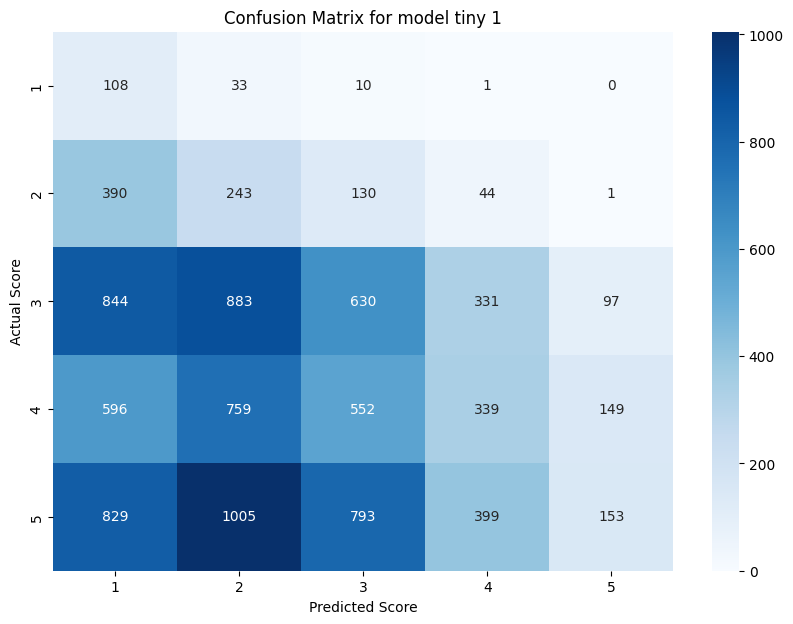

Confusion Matrix:
 [[ 108   33   10    1    0]
 [ 390  243  130   44    1]
 [ 844  883  630  331   97]
 [ 596  759  552  339  149]
 [ 829 1005  793  399  153]]
+----------+-----------+--------+----------+
| Category | Precision | Recall | Accuracy |
+----------+-----------+--------+----------+
|    1     |  0.0434   | 0.6954 |  0.7465  |
|    2     |  0.0989   | 0.3185 |  0.6897  |
|    3     |  0.2999   | 0.2234 |  0.6121  |
|    4     |  0.2948   | 0.1724 |  0.6812  |
|    5     |  0.4185   | 0.1082 |  0.6444  |
|   Mean   |  0.2311   | 0.3036 |  0.6748  |
+----------+-----------+--------+----------+


,Category,Precision,Recall,Accuracy
0,1,0.0434,0.6954,0.7465
1,2,0.0989,0.3185,0.6897
2,3,0.2999,0.2234,0.6121
3,4,0.2948,0.1724,0.6812
4,5,0.4185,0.1082,0.6444
5,Mean,0.2311,0.3036,0.6748


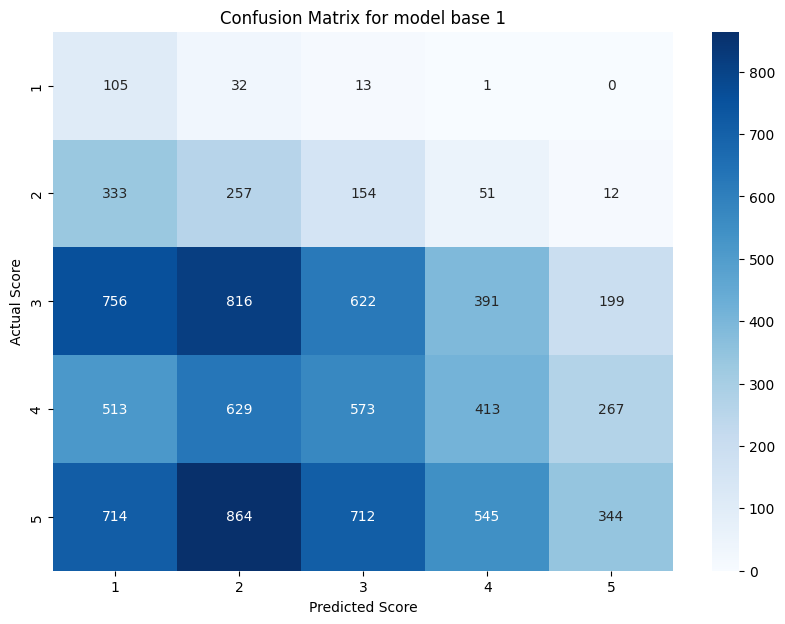

Confusion Matrix:
 [[105  32  13   1   0]
 [333 257 154  51  12]
 [756 816 622 391 199]
 [513 629 573 413 267]
 [714 864 712 545 344]]
+----------+-----------+--------+----------+
| Category | Precision | Recall | Accuracy |
+----------+-----------+--------+----------+
|    1     |  0.0521   | 0.6447 |  0.803   |
|    2     |  0.1187   | 0.2809 |  0.7567  |
|    3     |  0.3335   | 0.2136 |  0.6374  |
|    4     |  0.2886   |  0.22  |  0.6602  |
|    5     |  0.4849   | 0.2922 |  0.6526  |
|   Mean   |  0.2556   | 0.3303 |  0.702   |
+----------+-----------+--------+----------+


,Category,Precision,Recall,Accuracy
0,1,0.0521,0.6447,0.8030
1,2,0.1187,0.2809,0.7567
2,3,0.3335,0.2136,0.6374
3,4,0.2886,0.2200,0.6602
4,5,0.4849,0.2922,0.6526
5,Mean,0.2556,0.3303,0.7020


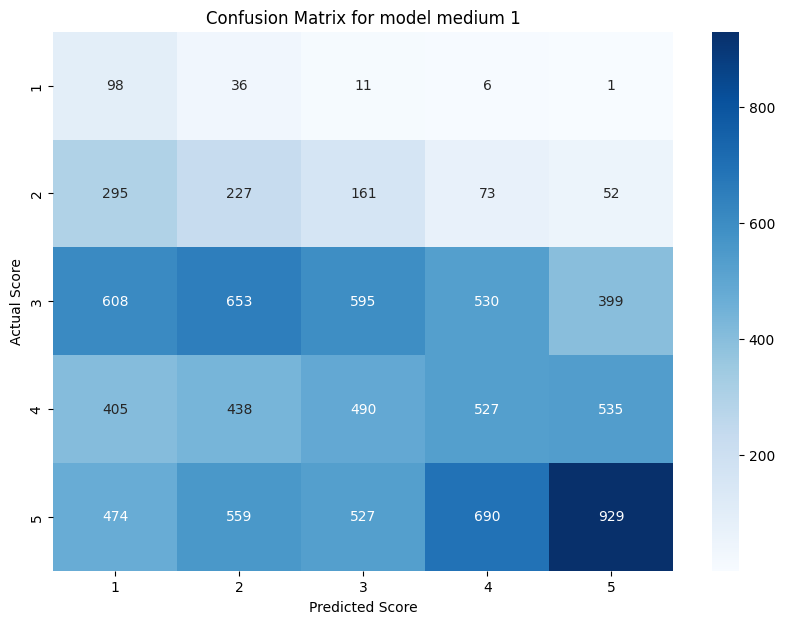

Confusion Matrix:
 [[ 98  36  11   6   1]
 [295 227 161  73  52]
 [608 653 595 530 399]
 [405 438 490 527 535]
 [474 559 527 690 929]]
+----------+-----------+--------+----------+
| Category | Precision | Recall | Accuracy |
+----------+-----------+--------+----------+
|    1     |  0.0634   | 0.7237 |  0.821   |
|    2     |  0.1505   | 0.2871 |  0.7976  |
|    3     |  0.3718   | 0.1853 |  0.6629  |
|    4     |  0.2639   | 0.1662 |  0.6666  |
|    5     |  0.5272   | 0.5215 |  0.6772  |
|   Mean   |  0.2754   | 0.3768 |  0.7251  |
+----------+-----------+--------+----------+


,Category,Precision,Recall,Accuracy
0,1,0.0634,0.7237,0.8210
1,2,0.1505,0.2871,0.7976
2,3,0.3718,0.1853,0.6629
3,4,0.2639,0.1662,0.6666
4,5,0.5272,0.5215,0.6772
5,Mean,0.2754,0.3768,0.7251


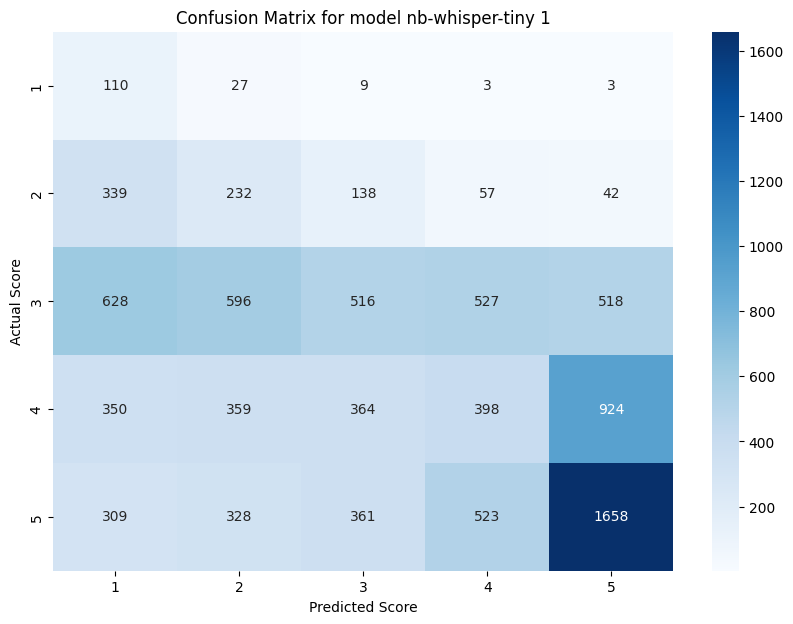

Confusion Matrix:
 [[ 110   27    9    3    3]
 [ 339  232  138   57   42]
 [ 628  596  516  527  518]
 [ 350  359  364  398  924]
 [ 309  328  361  523 1658]]
+----------+-----------+--------+----------+
| Category | Precision | Recall | Accuracy |
+----------+-----------+--------+----------+
|    1     |  0.0781   | 0.7007 |  0.8644  |
|    2     |  0.1824   | 0.2984 |  0.8241  |
|    3     |  0.4076   | 0.1805 |  0.6765  |
|    4     |  0.2642   | 0.1679 |  0.6656  |
|    5     |  0.5147   | 0.6345 |  0.6708  |
|   Mean   |  0.2894   | 0.3964 |  0.7403  |
+----------+-----------+--------+----------+


,Category,Precision,Recall,Accuracy
0,1,0.0781,0.7007,0.8644
1,2,0.1824,0.2984,0.8241
2,3,0.4076,0.1805,0.6765
3,4,0.2642,0.1679,0.6656
4,5,0.5147,0.6345,0.6708
5,Mean,0.2894,0.3964,0.7403


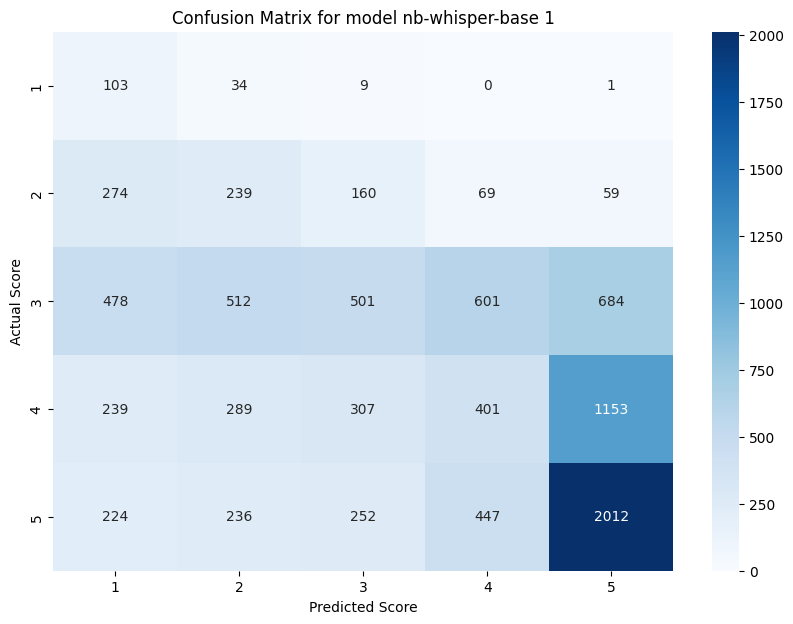

Confusion Matrix:
 [[ 103   34    9    0    1]
 [ 274  239  160   69   59]
 [ 478  512  501  601  684]
 [ 239  289  307  401 1153]
 [ 224  236  252  447 2012]]
+----------+-----------+--------+----------+
| Category | Precision | Recall | Accuracy |
+----------+-----------+--------+----------+
|    1     |  0.0902   | 0.6284 |  0.8932  |
|    2     |  0.2193   | 0.2848 |  0.8505  |
|    3     |  0.4734   | 0.1763 |  0.6951  |
|    4     |  0.2659   | 0.1485 |  0.6756  |
|    5     |  0.4942   | 0.7552 |  0.6525  |
|   Mean   |  0.3086   | 0.3986 |  0.7534  |
+----------+-----------+--------+----------+


,Category,Precision,Recall,Accuracy
0,1,0.0902,0.6284,0.8932
1,2,0.2193,0.2848,0.8505
2,3,0.4734,0.1763,0.6951
3,4,0.2659,0.1485,0.6756
4,5,0.4942,0.7552,0.6525
5,Mean,0.3086,0.3986,0.7534


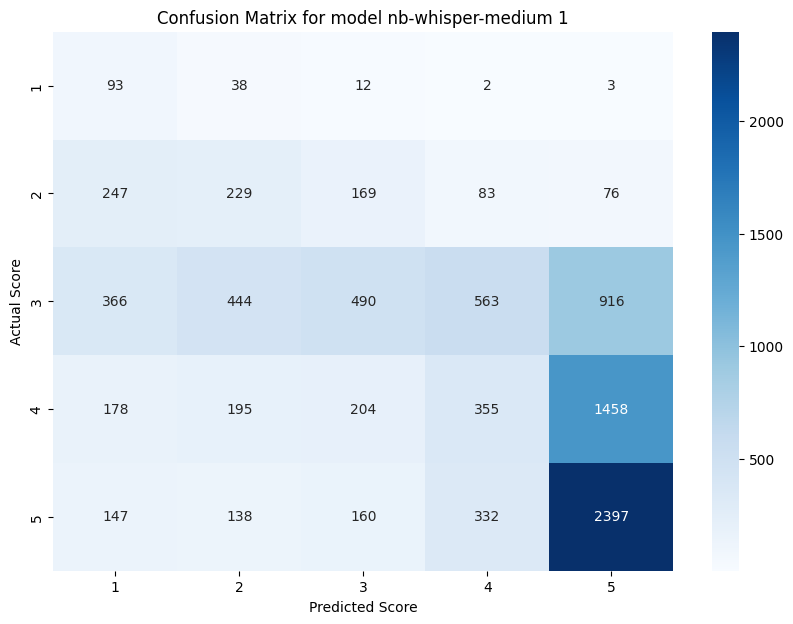

Confusion Matrix:
 [[  93   38   12    2    3]
 [ 247  229  169   83   76]
 [ 366  444  490  563  916]
 [ 178  195  204  355 1458]
 [ 147  138  160  332 2397]]
+----------+-----------+--------+----------+
| Category | Precision | Recall | Accuracy |
+----------+-----------+--------+----------+
|    1     |  0.0641   | 0.6809 |  0.8432  |
|    2     |  0.1688   | 0.3145 |  0.8066  |
|    3     |  0.3894   | 0.2057 |  0.6661  |
|    4     |  0.2662   | 0.1855 |  0.6589  |
|    5     |  0.5169   | 0.5128 |  0.6696  |
|   Mean   |  0.2811   | 0.3799 |  0.7289  |
+----------+-----------+--------+----------+


,Category,Precision,Recall,Accuracy
0,1,0.0641,0.6809,0.8432
1,2,0.1688,0.3145,0.8066
2,3,0.3894,0.2057,0.6661
3,4,0.2662,0.1855,0.6589
4,5,0.5169,0.5128,0.6696
5,Mean,0.2811,0.3799,0.7289


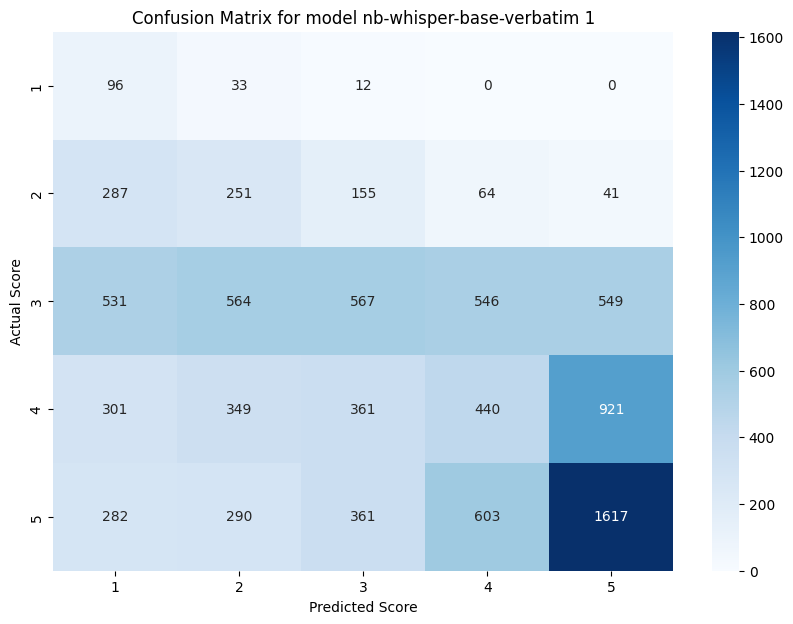

Confusion Matrix:
 [[  96   33   12    0    0]
 [ 287  251  155   64   41]
 [ 531  564  567  546  549]
 [ 301  349  361  440  921]
 [ 282  290  361  603 1617]]
+----------+-----------+--------+----------+
| Category | Precision | Recall | Accuracy |
+----------+-----------+--------+----------+
|    1     |  0.0865   | 0.6623 |  0.8812  |
|    2     |  0.2131   | 0.2946 |  0.8445  |
|    3     |  0.4328   | 0.1698 |  0.6853  |
|    4     |  0.2482   | 0.1403 |  0.6698  |
|    5     |  0.4922   | 0.7119 |  0.6511  |
|   Mean   |  0.2946   | 0.3958 |  0.7464  |
+----------+-----------+--------+----------+


,Category,Precision,Recall,Accuracy
0,1,0.0865,0.6623,0.8812
1,2,0.2131,0.2946,0.8445
2,3,0.4328,0.1698,0.6853
3,4,0.2482,0.1403,0.6698
4,5,0.4922,0.7119,0.6511
5,Mean,0.2946,0.3958,0.7464


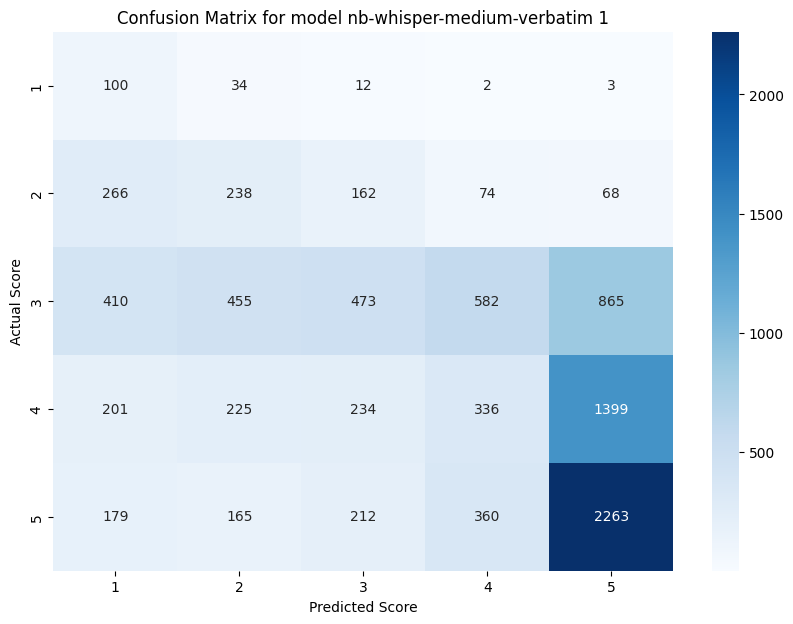

Confusion Matrix:
 [[ 100   34   12    2    3]
 [ 266  238  162   74   68]
 [ 410  455  473  582  865]
 [ 201  225  234  336 1399]
 [ 179  165  212  360 2263]]
+----------+-----------+--------+----------+
| Category | Precision | Recall | Accuracy |
+----------+-----------+--------+----------+
|    1     |  0.0638   | 0.7566 |  0.8149  |
|    2     |  0.1394   | 0.2983 |  0.7795  |
|    3     |  0.3455   | 0.1968 |  0.6486  |
|    4     |  0.2877   | 0.1791 |  0.6751  |
|    5     |  0.5214   | 0.4445 |  0.6713  |
|   Mean   |  0.2716   | 0.3751 |  0.7179  |
+----------+-----------+--------+----------+


,Category,Precision,Recall,Accuracy
0,1,0.0638,0.7566,0.8149
1,2,0.1394,0.2983,0.7795
2,3,0.3455,0.1968,0.6486
3,4,0.2877,0.1791,0.6751
4,5,0.5214,0.4445,0.6713
5,Mean,0.2716,0.3751,0.7179


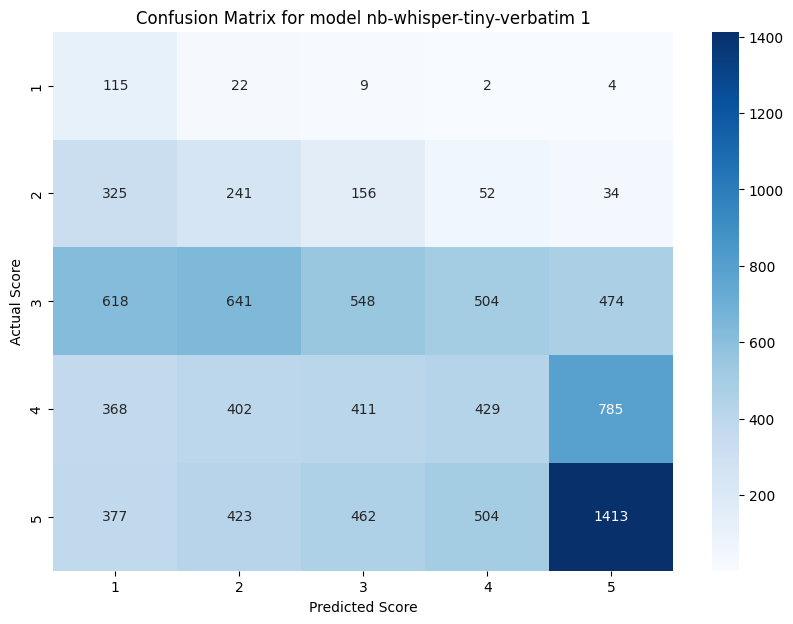

Confusion Matrix:
 [[ 115   22    9    2    4]
 [ 325  241  156   52   34]
 [ 618  641  548  504  474]
 [ 368  402  411  429  785]
 [ 377  423  462  504 1413]]
+----------+-----------+--------+----------+
| Category | Precision | Recall | Accuracy |
+----------+-----------+--------+----------+
|    1     |  0.0638   | 0.7566 |  0.8149  |
|    2     |  0.1394   | 0.2983 |  0.7795  |
|    3     |  0.3455   | 0.1968 |  0.6486  |
|    4     |  0.2877   | 0.1791 |  0.6751  |
|    5     |  0.5214   | 0.4445 |  0.6713  |
|   Mean   |  0.2716   | 0.3751 |  0.7179  |
+----------+-----------+--------+----------+


,Category,Precision,Recall,Accuracy
0,1,0.0638,0.7566,0.8149
1,2,0.1394,0.2983,0.7795
2,3,0.3455,0.1968,0.6486
3,4,0.2877,0.1791,0.6751
4,5,0.5214,0.4445,0.6713
5,Mean,0.2716,0.3751,0.7179


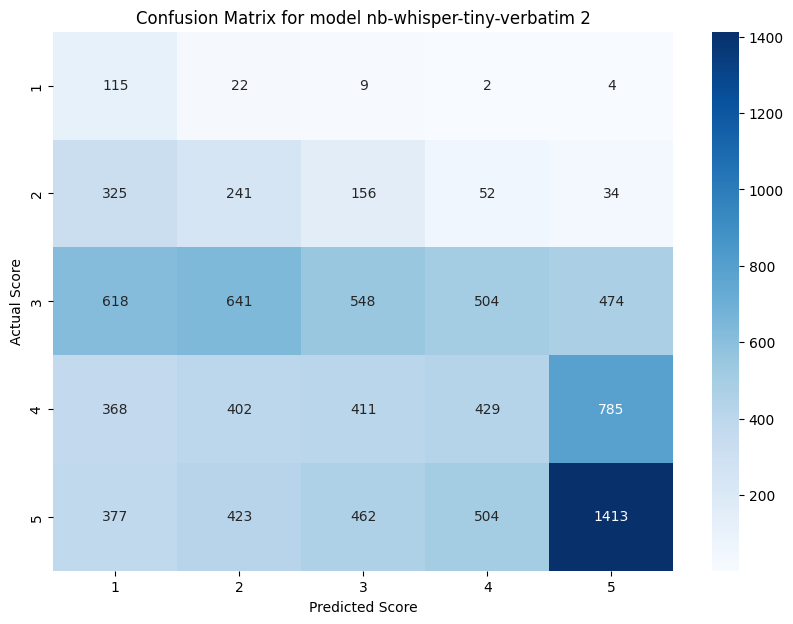

Confusion Matrix:
 [[ 115   22    9    2    4]
 [ 325  241  156   52   34]
 [ 618  641  548  504  474]
 [ 368  402  411  429  785]
 [ 377  423  462  504 1413]]
+----------+-----------+--------+----------+
| Category | Precision | Recall | Accuracy |
+----------+-----------+--------+----------+
|    1     |  0.0641   | 0.6809 |  0.8432  |
|    2     |  0.1688   | 0.3145 |  0.8066  |
|    3     |  0.3894   | 0.2057 |  0.6661  |
|    4     |  0.2662   | 0.1855 |  0.6589  |
|    5     |  0.5169   | 0.5128 |  0.6696  |
|   Mean   |  0.2811   | 0.3799 |  0.7289  |
+----------+-----------+--------+----------+


,Category,Precision,Recall,Accuracy
0,1,0.0641,0.6809,0.8432
1,2,0.1688,0.3145,0.8066
2,3,0.3894,0.2057,0.6661
3,4,0.2662,0.1855,0.6589
4,5,0.5169,0.5128,0.6696
5,Mean,0.2811,0.3799,0.7289


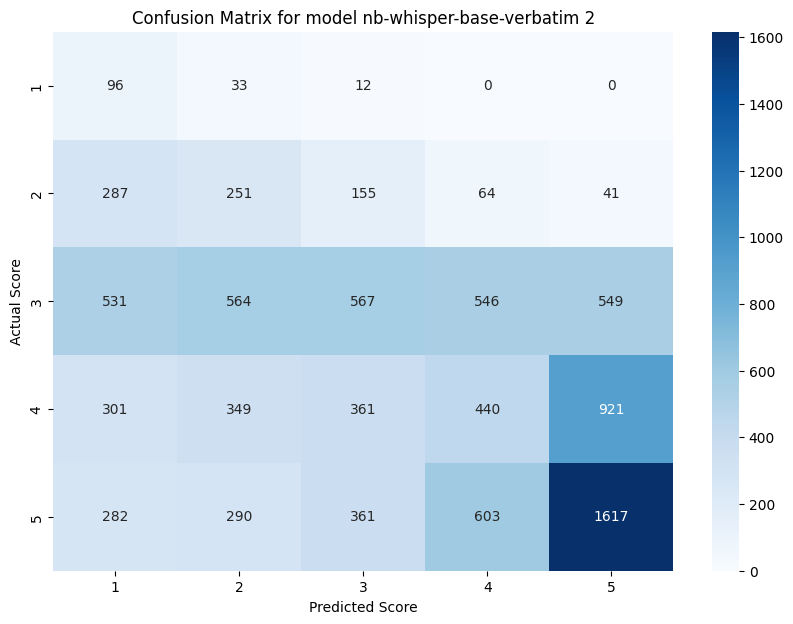

Confusion Matrix:
 [[  96   33   12    0    0]
 [ 287  251  155   64   41]
 [ 531  564  567  546  549]
 [ 301  349  361  440  921]
 [ 282  290  361  603 1617]]
+----------+-----------+--------+----------+
| Category | Precision | Recall | Accuracy |
+----------+-----------+--------+----------+
|    1     |  0.0865   | 0.6623 |  0.8812  |
|    2     |  0.2131   | 0.2946 |  0.8445  |
|    3     |  0.4328   | 0.1698 |  0.6853  |
|    4     |  0.2482   | 0.1403 |  0.6698  |
|    5     |  0.4922   | 0.7119 |  0.6511  |
|   Mean   |  0.2946   | 0.3958 |  0.7464  |
+----------+-----------+--------+----------+


,Category,Precision,Recall,Accuracy
0,1,0.0865,0.6623,0.8812
1,2,0.2131,0.2946,0.8445
2,3,0.4328,0.1698,0.6853
3,4,0.2482,0.1403,0.6698
4,5,0.4922,0.7119,0.6511
5,Mean,0.2946,0.3958,0.7464


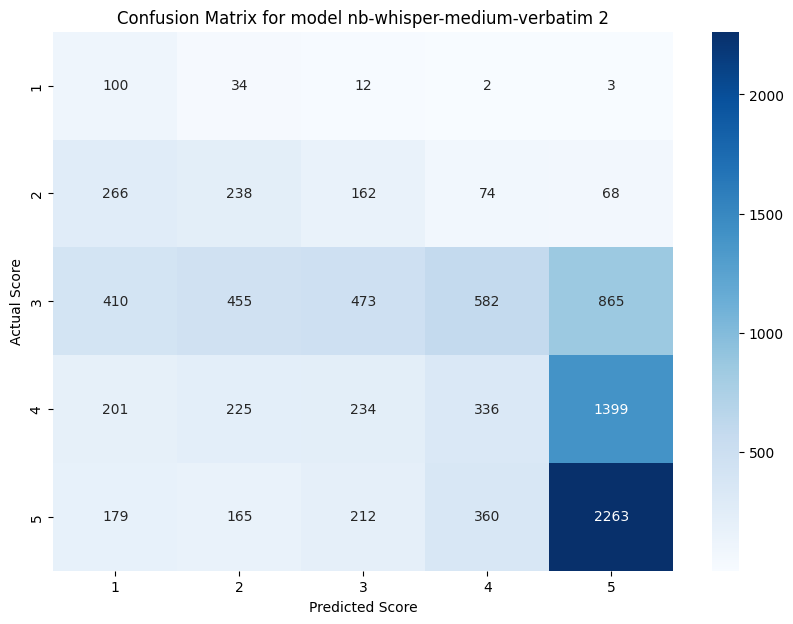

Confusion Matrix:
 [[ 100   34   12    2    3]
 [ 266  238  162   74   68]
 [ 410  455  473  582  865]
 [ 201  225  234  336 1399]
 [ 179  165  212  360 2263]]


In [ ]:

save = False

empty_transcription_path = './Transcriptions/Empty_Transcriptions/'
directory = './Transcriptions'

dir_list =  os.listdir(directory)
for file in dir_list:
    if file.startswith('trans') and file.endswith('.csv'):
        model_name = file.split('_')[1]
        version = file.split('_v')[1].split('.c')[0]
        df = pd.read_csv(os.path.join(directory, file))
        word_score = df['OG Score']
        cer_score = df['CER Score']
        
        smf.accuracy_precision_recall(word_score=word_score, cer_score=cer_score, name=model_name, 
                                    version=version, save=save, 
                                    directory='./Transcriptions/Metrics_results')
        
        smf.conf_matrix(word_score=word_score, cer_score=cer_score, 
                        name=model_name, version=version, save=save, plot=True,
                        directory='./Transcriptions/Confution_matrix')